Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=14

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=8 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
244                                           NaN             Timor-Leste   
245                                           NaN                    Togo   
246                                           NaN     Trinidad and Tobago   
247                                           NaN                 Tunisia   
248                                           NaN                  Turkey   
249                                           NaN           United States   
250                                           NaN                  Uganda   
251                                           NaN                 Ukraine   
252                                           NaN    United Arab Emirates   
253                                      Anguilla          United Kingdom   
254                                       Bermuda          United Kingdom   
255                        British Virgin Islands          United Kingdom   
256                                Cayman Islands          United Kingdom   
257                               Channel Islands          United Kingdom   
258                   Falkland Islands (Malvinas)          United Kingdom   
259                                     Gibraltar          United Kingdom   
260                                   Isle of Man          United Kingdom   
261                                    Montserrat          United Kingdom   
262  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
263                      Turks and Caicos Islands          United Kingdom   
264                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
250                                           NaN             Timor-Leste   
251                                           NaN                    Togo   
252                                           NaN     Trinidad and Tobago   
253                                           NaN                 Tunisia   
254                                           NaN                  Turkey   
255                                           NaN           United States   
256                                           NaN                  Uganda   
257                                           NaN                 Ukraine   
258                                           NaN    United Arab Emirates   
259                                      Anguilla          United Kingdom   
260                                       Bermuda          United Kingdom   
261                        British Virgin Islands          United Kingdom   
262                                Cayman Islands          United Kingdom   
263                               Channel Islands          United Kingdom   
264                   Falkland Islands (Malvinas)          United Kingdom   
265                                     Gibraltar          United Kingdom   
266                                   Isle of Man          United Kingdom   
267                                    Montserrat          United Kingdom   
268  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
269                      Turks and Caicos Islands          United Kingdom   
270                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/7/21  3/8/21  3/9/21  3/10/21  \
185        0        0        0        0  ...     442     442     442      442   
186        0        0        0        0  ...      10      10      10       10   
187        0        0        0        0  ...  190604  190923  191789   192491   
188        0        0        0        0  ...       0       0       0        0   
189        0        0        0        0  ...    4111    4129    4150     4183   
190        0        0        0        0  ...      26      26      26       26   
191        0        0        0        0  ...       2       3       3        3   
192        0        0        0        0  ...    1067    1085    1092     1100   
193        0        0        0        0  ...    8682    8683    8695     8705   
194        0        0        0        0  ...     693     698     700      707   

     3/11/21  3/12/21  3/13/21  3/14/21   Population           region  
185      442      442      443      444     4,649,658  Mauritania_nan  
186       10       10       10       10           NaN   Mauritius_nan  
187   193152   193851   194490   194710   128,640,794      Mexico_nan  
188        0        0        0        0           NaN  Micronesia_nan  
189     4220     4258     4294     4330     4,035,942     Moldova_nan  
190       26       27       27       27        39,183      Monaco_nan  
191        4        4        4        4     3,278,290    Mongolia_nan  
192     1113     1117     1122     1129       622 500  Montenegro_nan  
193     8712     8716     8718     8723    36,817,128     Morocco_nan  
194      711      719      722      725    31,542,919  Mozambique_nan  

[10 rows x 424 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat      Long  \
175                               NaN     Montenegro  42.708678  19.37439   
176                               NaN        Morocco  31.791700  -7.09260   
177                               NaN     Mozambique -18.665700  35.52960   
178                               NaN        Namibia -22.957600  18.49040   
179                               NaN          Nepal  28.166700  84.25000   
180                             Aruba    Netherlands  12.521100 -69.96830   
181  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400 -68.23850   
182                           Curacao    Netherlands  12.169600 -68.99000   
183                      Sint Maarten    Netherlands  18.042500 -63.05480   
184                               NaN    Netherlands  52.132600   5.29130   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/7/21  \
175        0        0        0        0        0        0  ...   69645   
176        0        0        0        0        0        0  ...  472240   
177        0        0        0        0        0        0  ...   46421   
178        0        0        0        0        0        0  ...   37520   
179        0        0        0        0        0        0  ...  270886   
180        0        0        0        0        0        0  ...    7828   
181        0        0        0        0        0        0  ...     180   
182        0        0        0        0        0        0  ...    4673   
183        0        0        0        0        0        0  ...    2025   
184        0        0        0        0        0        0  ...       0   

     3/8/21  3/9/21  3/10/21  3/11/21  3/12/21  3/13/21  3/14/21  \
175   70137   70648    71233    71864    72490    72944    73611   
176  472544  473208   473738   474257   474938   475457   475849   
177   46594   47729    48451    48616    48938    49814    50380   
178   37578   37893    38043    38104    38217    38264    38470   
179  270927  270987   271050   271116   271177   271249   271326   
180    7828    7893     7929     7974     8009     8028     8045   
181     180     180      180      180      180      180      180   
182    4677    4682     4686     4688     4698     4705     4715   
183    2028    2031     2034     2035     2041     2041     2041   
184       0       0        0        0        0        0        0   

      Population                                         region  
175       622 500                                Montenegro_nan  
176    36,817,128                                   Morocco_nan  
177    31,542,919                                Mozambique_nan  
178     2,540,905                                   Namibia_nan  
179    29,300,000                                     Nepal_nan  
180       116,600                             Netherlands_Aruba  
181           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
182       158,665                           Netherlands_Curacao  
183           NaN                      Netherlands_Sint Maarten  
184    17,180,000                               Netherlands_nan  

[10 rows x 424 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN     Micronesia   7.425600  150.550800        0        0   
189            NaN        Moldova  47.411600   28.369900        0        0   
190            NaN         Monaco  43.733300    7.416700        0        0   
191            NaN       Mongolia  46.862500  103.846700        0        0   
192            NaN     Montenegro  42.708678   19.374390        0        0   
193            NaN        Morocco  31.791700   -7.092600        0        0   
194            NaN     Mozambique -18.665695   35.529562        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   3/7/21   3/8/21   3/9/21  \
185        0        0        0        0  ...    17322    17340    17365   
186        0        0        0        0  ...      641      641      641   
187        0        0        0        0  ...  2128600  2130477  2137884   
188        0        0        0        0  ...        1        1        1   
189        0        0        0        0  ...   195252   195602   196475   
190        0        0        0        0  ...     2023     2028     2048   
191        0        0        0        0  ...     3336     3372     3481   
192        0        0        0        0  ...    79774    80191    80803   
193        0        0        0        0  ...   486223   486325   486833   
194        0        0        0        0  ...    62520    62703    62882   

     3/10/21  3/11/21  3/12/21  3/13/21  3/14/21   Population           region  
185    17385    17394    17410    17424    17438     4,649,658  Mauritania_nan  
186      641      664      711      739      742           NaN   Mauritius_nan  
187  2144486  2150955  2157771  2163875  2166290   128,640,794      Mexico_nan  
188        1        1        1        1        1           NaN  Micronesia_nan  
189   198228   200124   201909   203710   204463     4,035,942     Moldova_nan  
190     2062     2075     2097     2106     2107        39,183      Monaco_nan  
191     3481     3664     3833     3961     4083     3,278,290    Mongolia_nan  
192    81457    82029    82610    83165    83693       622 500  Montenegro_nan  
193   487286   487750   488181   488632   488937    36,817,128     Morocco_nan  
194    63174    63645    64004    64296    64516    31,542,919  Mozambique_nan  

[10 rows x 424 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Rwanda  -1.940300   29.873900   
221            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
222            NaN                       Saint Lucia  13.909400  -60.978900   
223            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
224            NaN                             Samoa -13.759000 -172.104600   
225            NaN                        San Marino  43.942400   12.457800   
226            NaN             Sao Tome and Principe   0.186400    6.613100   
227            NaN                      Saudi Arabia  23.885942   45.079162   
228            NaN                           Senegal  14.497400  -14.452400   
229            NaN                            Serbia  44.016500   21.005900   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/7/21  \
220        0        0        0        0        0        0  ...   19551   
221        0        0        0        0        0        0  ...      41   
222        0        0        0        0        0        0  ...    3866   
223        0        0        0        0        0        0  ...    1663   
224        0        0        0        0        0        0  ...       3   
225        0        0        0        0        0        0  ...    3922   
226        0        0        0        0        0        0  ...    1950   
227        0        0        0        0        0        0  ...  379831   
228        0        0        0        0        0        0  ...   35857   
229        0        0        0        0        0        0  ...  485439   

     3/8/21  3/9/21  3/10/21  3/11/21  3/12/21  3/13/21  3/14/21  \
220   19659   19779    19846    19945    20057    20143    20186   
221      41      41       41       42       42       43       43   
222    3871    3902     3941     3966     3989     3989     4031   
223    1663    1663     1670     1674     1674     1680     1680   
224       3       3        3        3        3        3        3   
225    3935    3984     4030     4062     4096     4126     4126   
226    1961    1977     2010     2035     2057     2078     2078   
227  380182  380572   380958   381348   381708   382059   382407   
228   35959   36039    36195    36371    36569    36726    36892   
229  489530  494106   498696   503291   507959   512051   516277   

      Population                                 region  
220    12,952,218                            Rwanda_nan  
221           NaN             Saint Kitts and Nevis_nan  
222       184,106                       Saint Lucia_nan  
223       110,940  Saint Vincent and the Grenadines_nan  
224           NaN                             Samoa_nan  
225        33,916                        San Marino_nan  
226           NaN             Sao Tome and Principe_nan  
227    34,695,447                      Saudi Arabia_nan  
228    16,743,927                           Senegal_nan  
229     8,744,671                            Serbia_nan  

[10 rows x 424 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

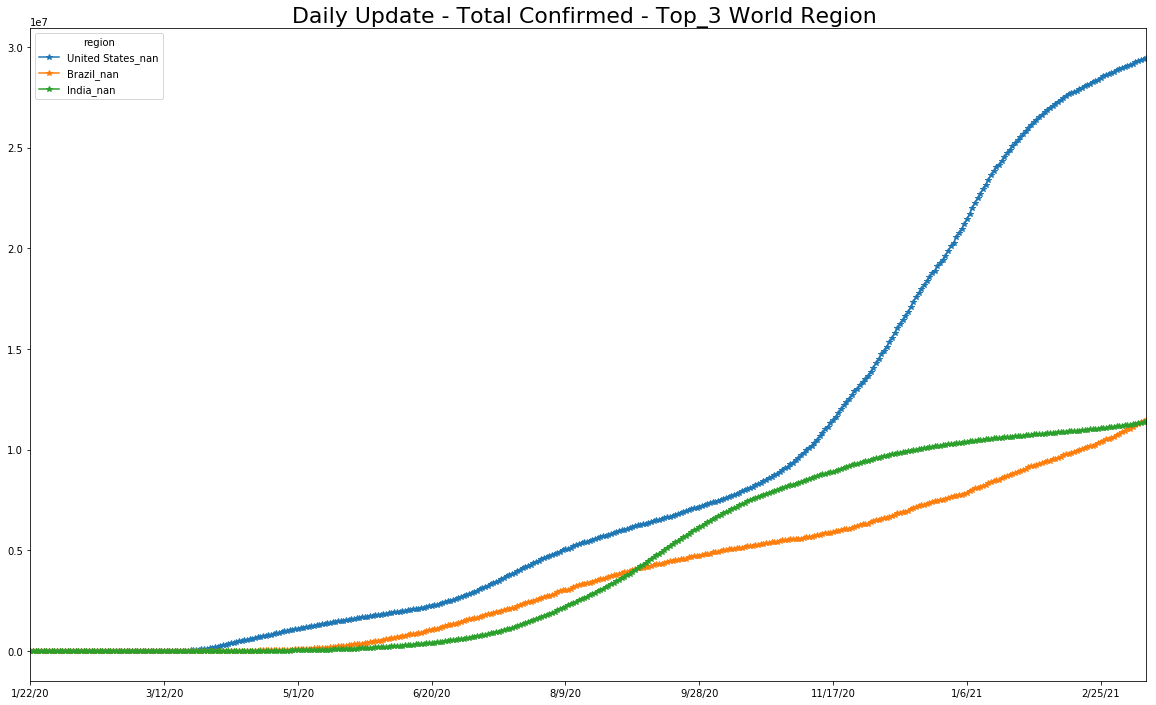

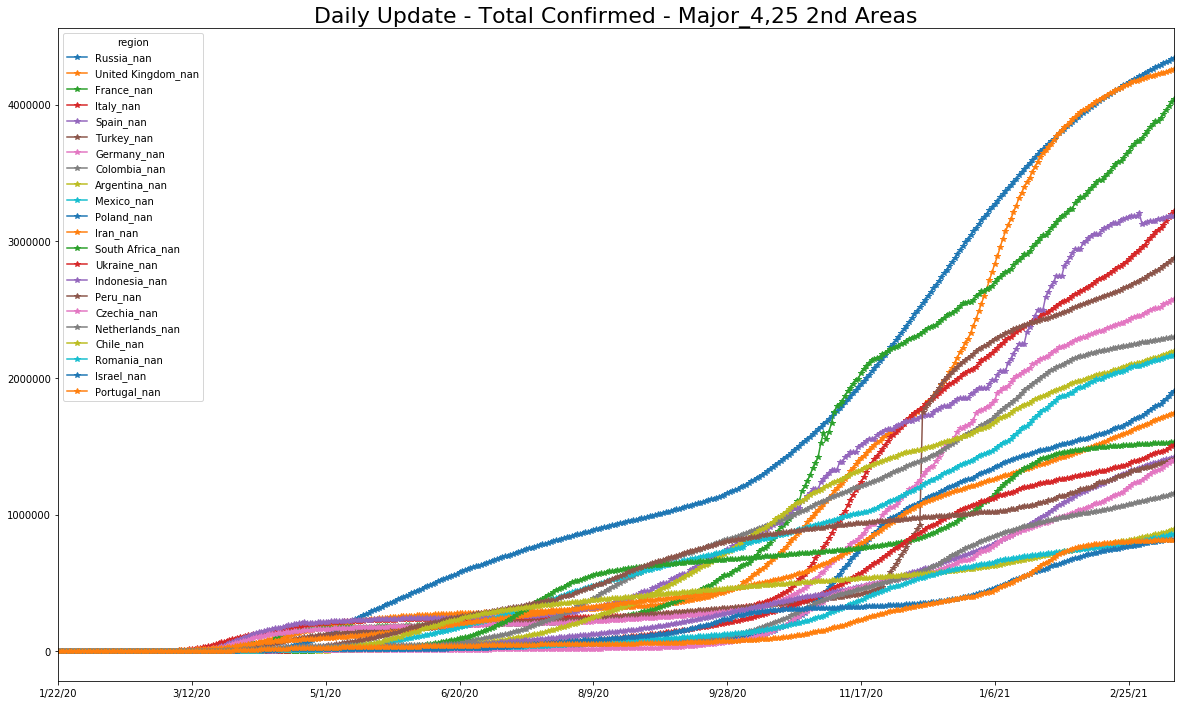

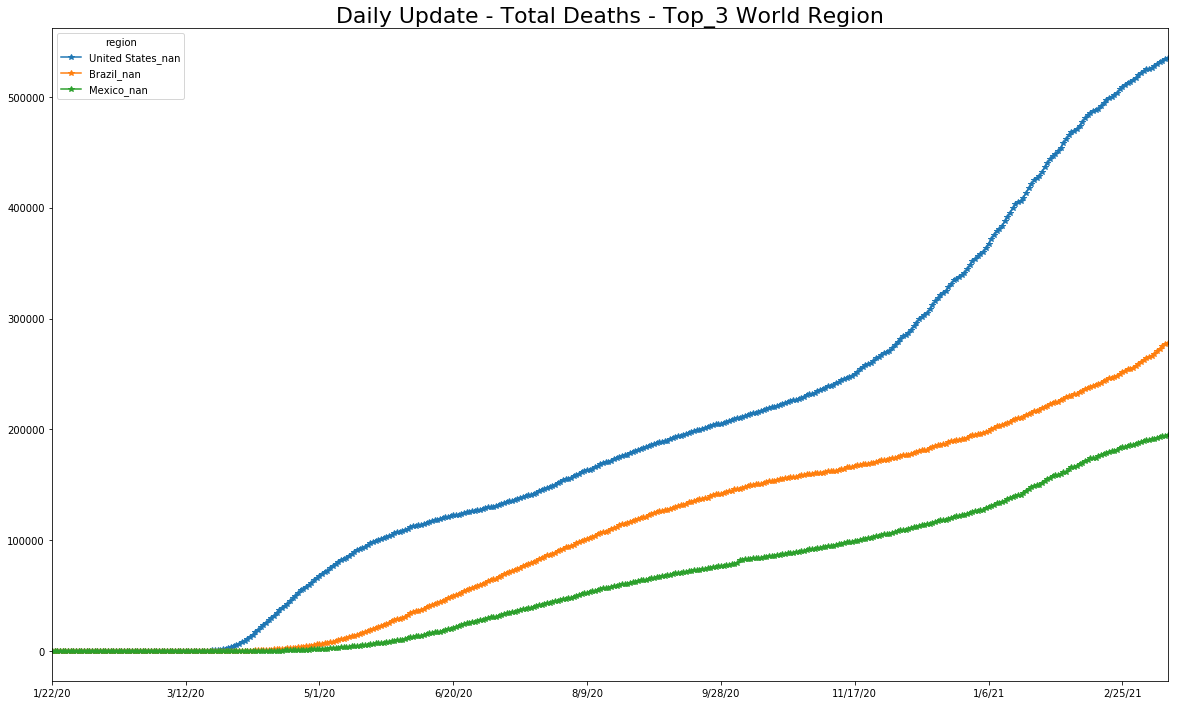

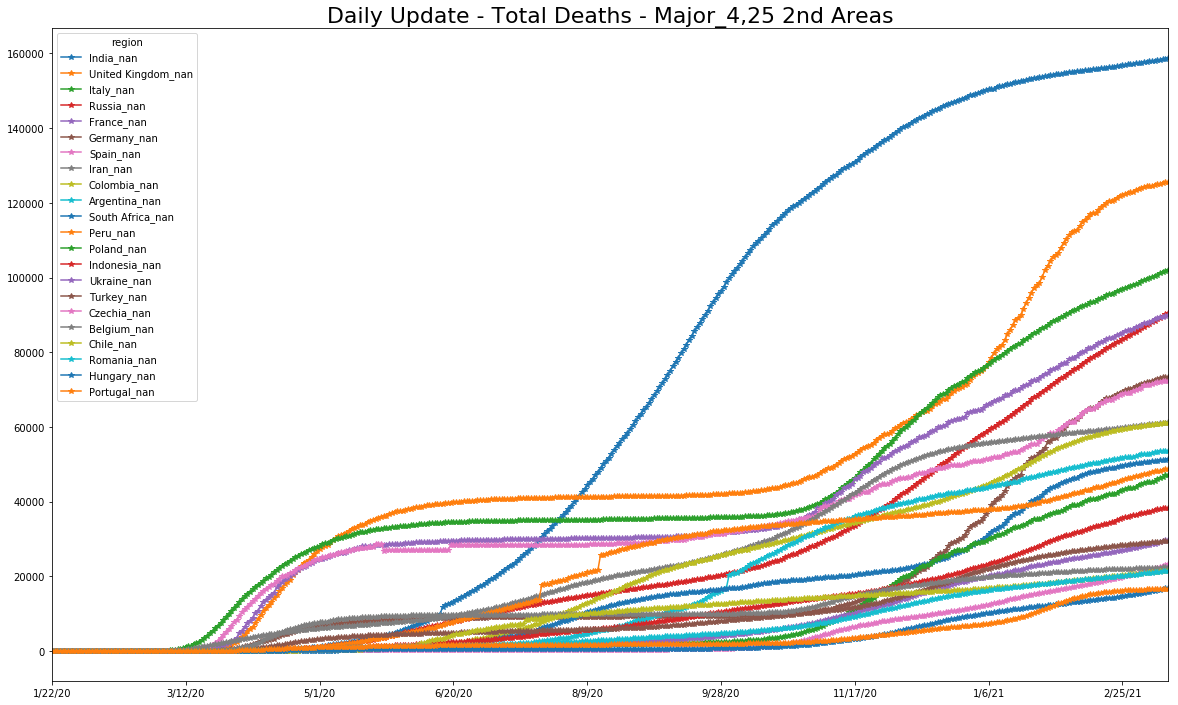

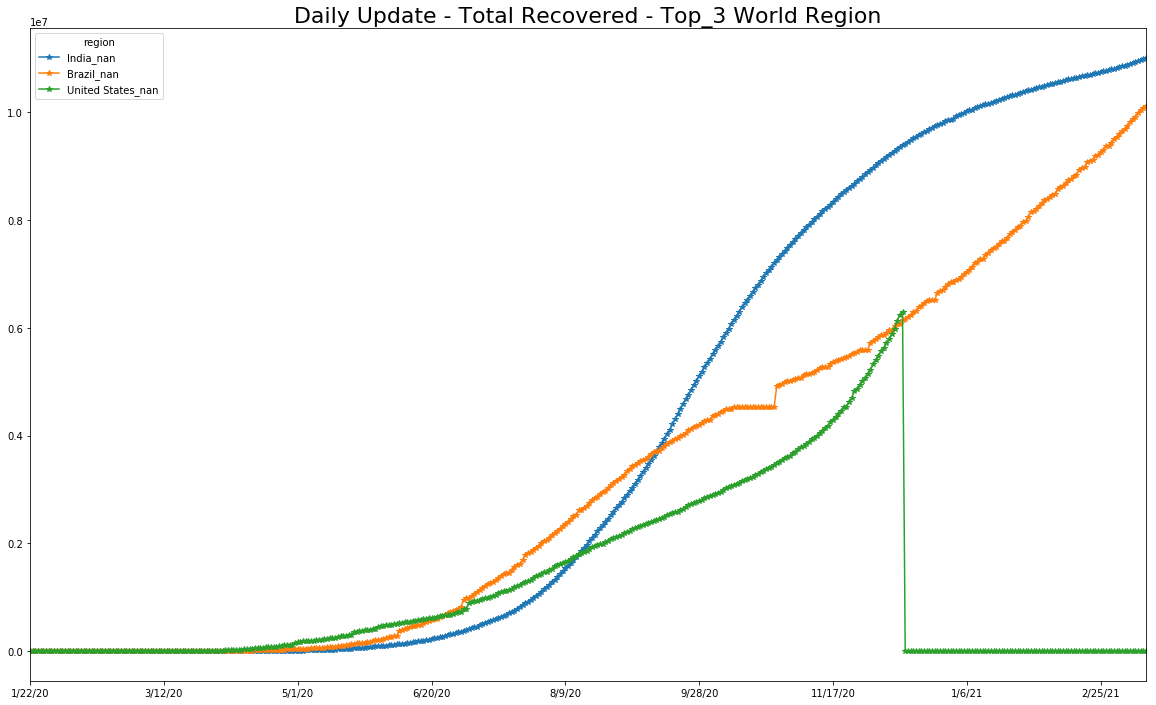

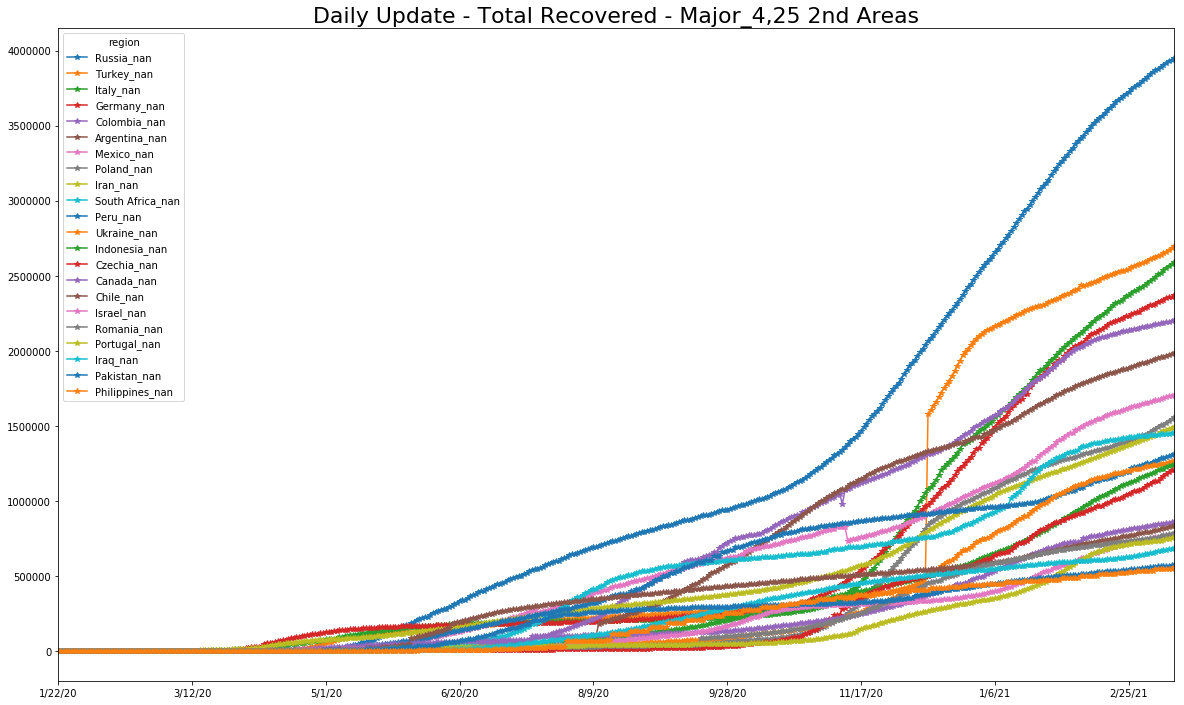

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/03/16


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
## DROP_N=15
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522802         1808           47287            0   
9/14/20  ...            6557228         1812           47836            0   
9/15/20  ...            6596784         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 274 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
3/11/21            55917       115442       114851        11130       21205   
3/12/21            55959       116123       115008        11199       21265   
3/13/21            55959       116821       115143        11228       21323   
3/14/21            55985       117474       115265        11266       21380   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
3/11/21                      882        2177898       176286   
3/12/21                      945        2185747       177104   
3/13/21                      962        2192025       177899   
3/14/21                      963        2195722       178385   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
3/11/21                                     123                       5234   
3/12/21                                     123                       5234   
3/13/21                                     123                       5237   
3/14/21                                     123                       5240   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
3/11/21  ...           29286134        67717           80392            3   
3/12/21  ...           29347338        69074           80392            3   
3/13/21  ...           29400553        70133           80481            3   
3/14/21  ...           29438775        71691           80567            3   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
3/11/21         144277         2533                  203669       2667   
3/12/21         144786         2550                  205652       2729   
3/13/21         145379         2553                  207436       2771   
3/14/21         145379         2554                  209304       2836   

region   Zambia_nan  Zimbabwe_nan  
3/11/21       83913         36377  
3/12/21       84240         36423  
3/13/21       84474         36471  
3/14/21       84797         36484  

[4 rows x 274 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
51490 2021-02-14     Zimbabwe_nan      35172            59           240   
51491 2021-02-15     Zimbabwe_nan      35222            68           308   
51492 2021-02-16     Zimbabwe_nan      35315            50           177   
51493 2021-02-17     Zimbabwe_nan      35423            93           211   
51494 2021-02-18     Zimbabwe_nan      35543           108           251   
51495 2021-02-19     Zimbabwe_nan      35710           120           321   
51496 2021-02-20     Zimbabwe_nan      35768           167           395   
51497 2021-02-21     Zimbabwe_nan      35796            58           345   
51498 2021-02-22     Zimbabwe_nan      35862            28           253   
51499 2021-02-23     Zimbabwe_nan      35910            66           152   
51500 2021-02-24     Zimbabwe_nan      35960            48           142   
51501 2021-02-25     Zimbabwe_nan      35994            50           164   
51502 2021-02-26     Zimbabwe_nan      36044            34           132   
51503 2021-02-27     Zimbabwe_nan      36058            50           134   
51504 2021-02-28     Zimbabwe_nan      36089            14            98   
51505 2021-03-01     Zimbabwe_nan      36115            31            95   
51506 2021-03-02     Zimbabwe_nan      36148            26            71   
51507 2021-03-03     Zimbabwe_nan      36179            33            90   
51508 2021-03-04     Zimbabwe_nan      36223            31            90   
51509 2021-03-05     Zimbabwe_nan      36248            44           108   
51510 2021-03-06     Zimbabwe_nan      36260            25  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
51519 2021-03-15  Zimbabwe_nan          0            13           107   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
51519           213         100.035672         100.294169         100.587274   

       last_day  kalman_prediction  population  infected_rate  min  max  
51519     36484            36517.0    14862924       0.000025  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
51519 2021-03-15  Zimbabwe_nan          0            13           107   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
51519           213         100.035672         100.294169         100.587274   

       last_day  kalman_prediction  population  infected_rate  min  max  
51519     36484            36517.0    14862924       0.000025  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
50413  2021-03-13  Zimbabwe_nan      36471            46           102   
50414  2021-03-14  Zimbabwe_nan      36484            48           130   
50415  2021-03-15  Zimbabwe_nan          0            13           107   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
50413           175         100.126481         100.280857         100.482813   
50414           211         100.131812         100.357750         100.581936   
50415           213         100.035672         100.294169         100.587274   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
50413                36423  ...    14862924       0.000025  NaN  NaN   
50414                36471  ...    14862924       0.000025  NaN  NaN   
50415                36484  ...    14862924       0.000025  NaN  NaN   

       population_percentage : infected_rate confirmed  \
50413                                         0.002451   
50414                                         0.002454   
50415                                         0.002455   

       population_percentage : factor 9/10 infected_rate confirmed  \
50413                                           0.022056             
50414                                           0.022085             
50415                                           0.022093             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
50413                    11.0                           0.740097   
50414                    14.0                           0.941941   
50415                    33.0                           2.220290   

       delta : roling 7day AVG  \
50413                25.000000   
50414                30.142857   
50415                30.428571   

       delta : aprox 14-day case notification rate per 100k hab  
50413                                           2.354853         
50414                                           2.839280         
50415                                           2.866192         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
264  United States_nan  4.763011e+12  2.182432e+06  193307.961749


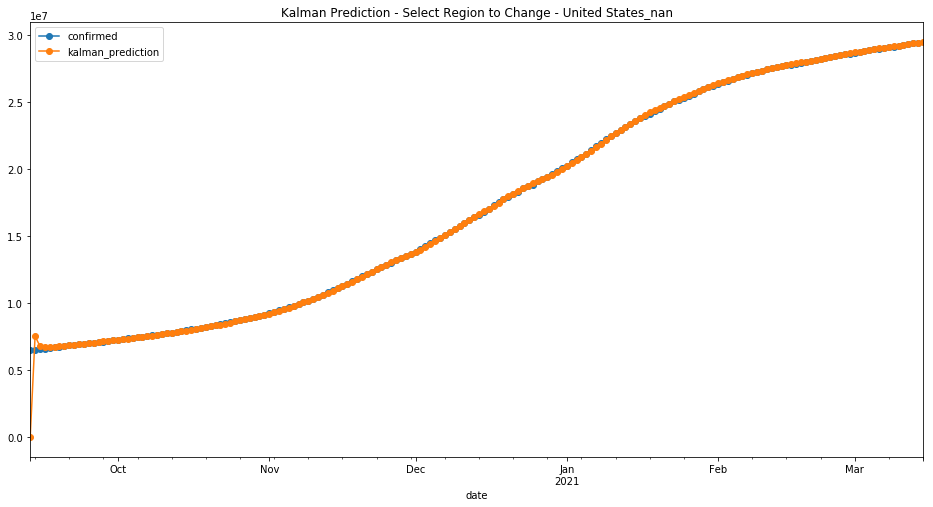

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
213  Russia_nan  1.035969e+11  321864.738404  26782.103825


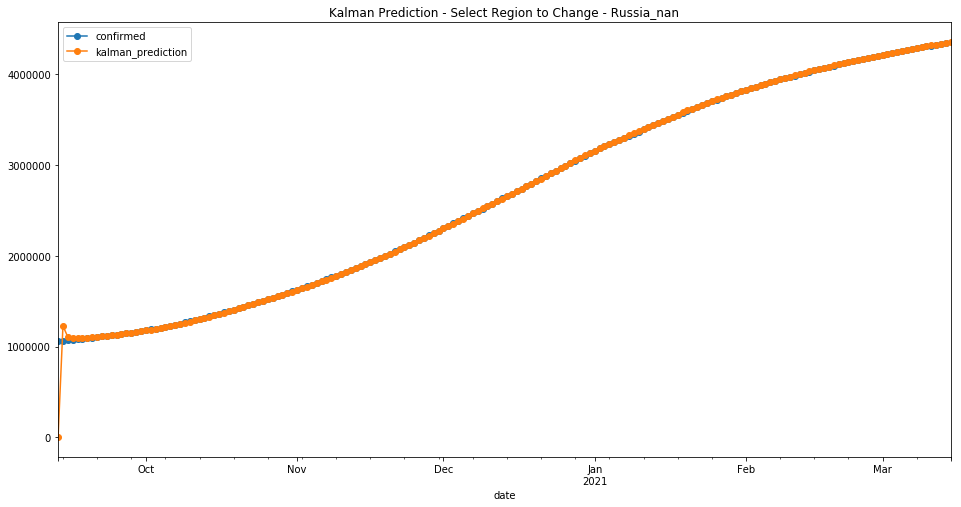

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse          mae
30  Brazil_nan  7.341097e+11  856802.014762  85021.84153


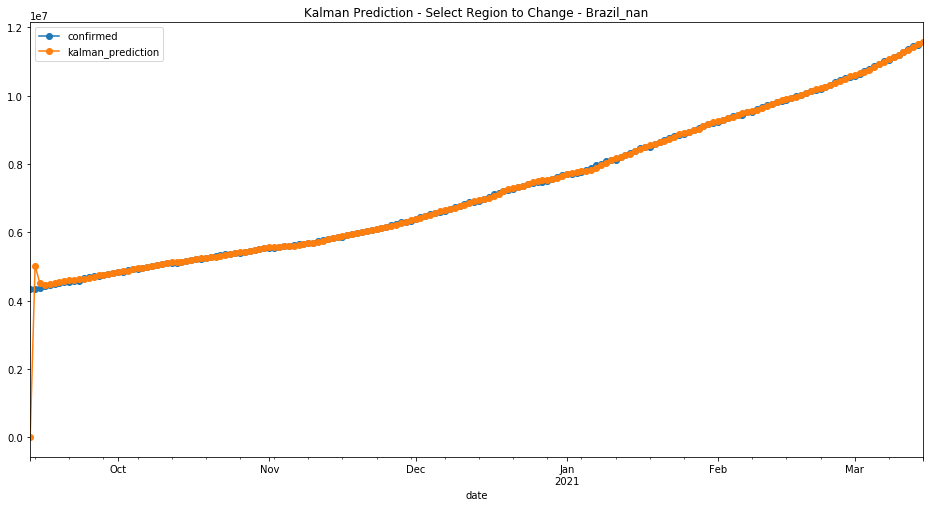

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
263  United Kingdom_nan  9.947180e+10  315391.507643  29199.032787


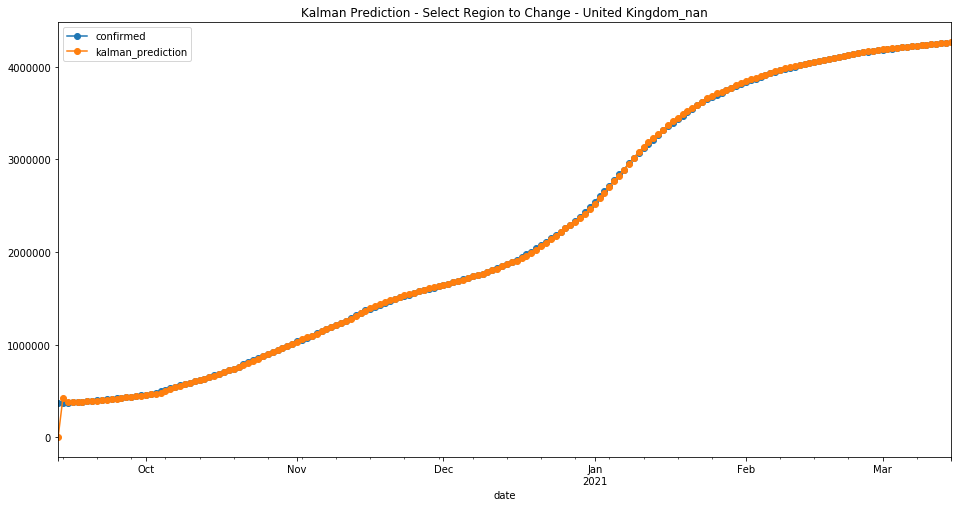

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj5rymi8h
  JVM stdout: /tmp/tmpj5rymi8h/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj5rymi8h/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 4 months and 17 days !!!
H2O cluster name:           H2O_from_python_unknownUser_pyls49
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-03-08
last_train_date= 2021-03-15
first_bootstrap_date= 2021-03-07
boost_bootstrap_date= 2021-03-12
first_test_date= 2021-03-06
last_test_date= 2021-03-16
first_valid_date= 2021-03-14


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    56033.0      55847 2021-03-07  Afghanistan_nan
1    56048.0      55876 2021-03-08  Afghanistan_nan
2    56069.0      55876 2021-03-09  Afghanistan_nan
3    56077.0      55894 2021-03-10  Afghanistan_nan
4    56091.0      55917 2021-03-11  Afghanistan_nan
5    56108.0      55959 2021-03-12  Afghanistan_nan
6    56147.0      55959 2021-03-13  Afghanistan_nan
7    56159.0      55985 2021-03-14  Afghanistan_nan
8    56180.0          0 2021-03-15  Afghanistan_nan
9   112972.0     112897 2021-03-07      Albania_nan
10  113766.0     113580 2021-03-08      Albania_nan
11  114433.0     114209 2021-03-09      Albania_nan
12  115058.0     114840 2021-03-10      Albania_nan
13  115661.0     115442 2021-03-11      Albania_nan
14  116231.0     116123 2021-03-12      Albania_nan
15  116872.0     116821 2021-03-13      Albania_nan
16  117536.0     117474 2021-03-14      Albania_nan
17  118184.0          0 2021-03-15      Albania_nan
18  114414.0     114234 2021-03-07      Algeria_nan
19  114549.0     114382 2021-03-08      Algeria_nan
20  114695.0     114543 2021-03-09      Algeria_nan
21  114850.0     114681 2021-03-10      Algeria_nan
22  114986.0     114851 2021-03-11      Algeria_nan
23  115152.0     115008 2021-03-12      Algeria_nan
24  115307.0     115143 2021-03-13      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  129041.0     129081 2021-03-11     Bahrain_nan
176  129676.0     129825 2021-03-12     Bahrain_nan
177  130422.0     130404 2021-03-13     Bahrain_nan
178  131021.0     131001 2021-03-14     Bahrain_nan
179  131637.0          0 2021-03-15     Bahrain_nan
180  550311.0     550330 2021-03-07  Bangladesh_nan
181  550949.0     551175 2021-03-08  Bangladesh_nan
182  551824.0     552087 2021-03-09  Bangladesh_nan
183  552748.0     553105 2021-03-10  Bangladesh_nan
184  553821.0     554156 2021-03-11  Bangladesh_nan
185  554933.0     555222 2021-03-12  Bangladesh_nan
186  556075.0     556236 2021-03-13  Bangladesh_nan
187  557152.0     557395 2021-03-14  Bangladesh_nan
188  558382.0          0 2021-03-15  Bangladesh_nan
189    3223.0       3285 2021-03-07    Barbados_nan
190    3429.0       3303 2021-03-08    Barbados_nan
191    3460.0       3333 2021-03-09    Barbados_nan
192    3396.0       3353 2021-03-10    Barbados_nan
193    3483.0       3372 2021-03-11    Barbados_nan
194    3509.0       3391 2021-03-12    Barbados_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date      region
220  12506.0      12359 2021-03-11  Belize_nan
221  12521.0      12370 2021-03-12  Belize_nan
222  12521.0      12370 2021-03-13  Belize_nan
223  12540.0      12370 2021-03-14  Belize_nan
224  12540.0          0 2021-03-15  Belize_nan
225   6424.0       6071 2021-03-07   Benin_nan
226   6425.0       6338 2021-03-08   Benin_nan
227   5759.0       6338 2021-03-09   Benin_nan
228   6732.0       6501 2021-03-10   Benin_nan
229   6371.0       6501 2021-03-11   Benin_nan
230   6856.0       6501 2021-03-12   Benin_nan
231   6865.0       6501 2021-03-13   Benin_nan
232   6799.0       6501 2021-03-14   Benin_nan
233   6778.0          0 2021-03-15   Benin_nan
234   1040.0        868 2021-03-07  Bhutan_nan
235   1067.0        868 2021-03-08  Bhutan_nan
236   1067.0        868 2021-03-09  Bhutan_nan
237   1064.0        868 2021-03-10  Bhutan_nan
238   1064.0        868 2021-03-11  Bhutan_nan
239   1064.0        868 2021-03-12  Bhutan_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  6014563869.91519
# MSE on the validation data =  14440902303206.506
# R^2 on the training data =  0.9995636472848132
# R^2 on the validation data =  0.04723908485454964


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1615873835213_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 6014563869.91519
RMSE: 77553.61932182914
MAE: 7884.456746908993
RMSLE: 0.20787094432008105
Mean Residual Deviance: 6014563869.91519

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 14440902303206.506
RMSE: 3800118.7222515177
MAE: 1199955.481709328
RMSLE: 9.237490468137972
Mean Residual Deviance: 14440902303206.506
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-03-16 05:50:42  0.061 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-03-16 05:50:42  0.430 sec   1.0                136413.20302202032  22175.475134782686  18608561958.726933   4085517.551215166   1241139.0615498312  16691453661287.168
     2021-03-16 05:50:42  0.629 sec   2.0                123377.23630260718  19809.7869230116    15221942437.66937    4090569.699786314   1247710.842430321   16732760468809.893
     2021-03-16 05:50:43  0.972 sec   3.0                109786.68325539485  18102.936049838805  12053115820.220394   4089695.0154328505  1245966.953512106   16725605319256.305
     2021-03-16 05:50:43  1.101 sec   4.0                105566.25294482989  16670.617759578527  11144233760.811806   4088521.439599455   1244532.267076647   16716007562064.398
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-03-16 05:50:54  12.117 sec  214.0              78589.83244600354   8545.140733161177   6176361763.890911    3819526.209330757   1202281.5564208175  14588780463764.584
     2021-03-16 05:50:58  16.175 sec  305.0              78010.21481756898   8041.988868237378   6085593615.883258    3817363.996649923   1202623.955344174   14572267882919.072
     2021-03-16 05:51:02  20.203 sec  396.0              77991.8148349433    7876.483978046856   6082723181.248082    3805417.380083327   1200859.0350657403  14481201436640.254
     2021-03-16 05:51:06  24.226 sec  484.0              78094.69039445011   7888.167393359734   6098780667.805018    3799289.6899626963  1199865.704183265   14434602148256.842
     2021-03-16 05:51:07  25.160 sec  500.0              77553.61932182914   7884.456746908993   6014563869.91519     3800118.7222515177  1199955.481709328   14440902303206.506


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           1.42795e+19            1                    0.327307
kalman_prediction  1.17241e+19            0.821043             0.268734
region             7.14134e+18            0.500112             0.16369
7_day_change       3.56418e+18            0.249602             0.0816965
1_day_change       1.94481e+18            0.136196             0.0445779
3_day_change       1.65354e+18            0.115798             0.0379017
infected_rate      1.597e+18              0.111839             0.0366056
max                8.72034e+17            0.061069             0.0199883
min                6.23693e+17            0.0436775            0.014296
7_day_change_rate  9.99479e+16            0.0069994            0.00229096
3_day_change_rate  8.98415e+16            0.00629165           0.0020593
1_day_change_rate  3.71928e+16            0.00260463           0.000852515

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         1.427949e+19           1.000000    0.327307
1   kalman_prediction         1.172408e+19           0.821043    0.268734
2              region         7.141336e+18           0.500112    0.163690
3        7_day_change         3.564184e+18           0.249602    0.081696
4        1_day_change         1.944808e+18           0.136196    0.044578
5        3_day_change         1.653542e+18           0.115798    0.037902
6       infected_rate         1.596997e+18           0.111839    0.036606
7                 max         8.720345e+17           0.061069    0.019988
8                 min         6.236928e+17           0.043678    0.014296
9   7_day_change_rate         9.994790e+16           0.006999    0.002291
10  3_day_change_rate         8.984148e+16           0.006292    0.002059
11  1_day_change_rate         3.719278e+16           0.002605    0.000853

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


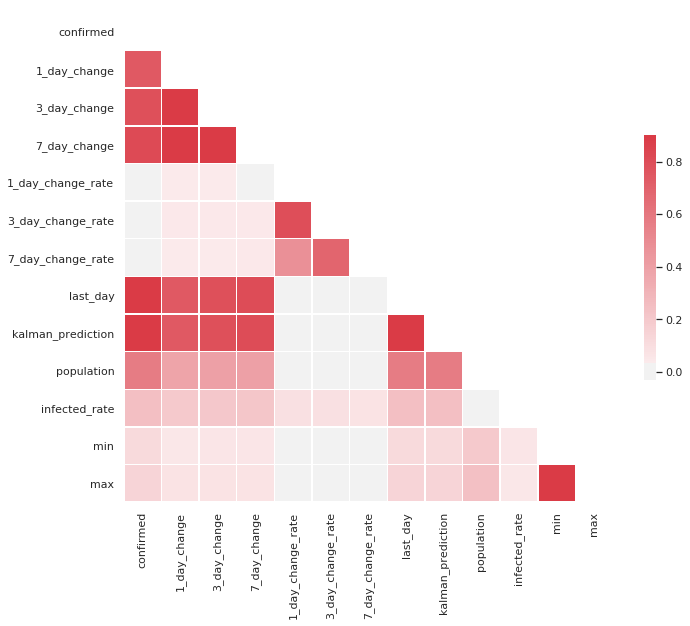

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.749692
3_day_change         0.792531
7_day_change         0.813144
1_day_change_rate    0.023362
3_day_change_rate    0.021741
7_day_change_rate    0.015119
last_day             0.992719
kalman_prediction    0.993218
population           0.574659
infected_rate        0.249548
min                  0.121451
max                  0.143284
Name: confirmed, dtype: float64


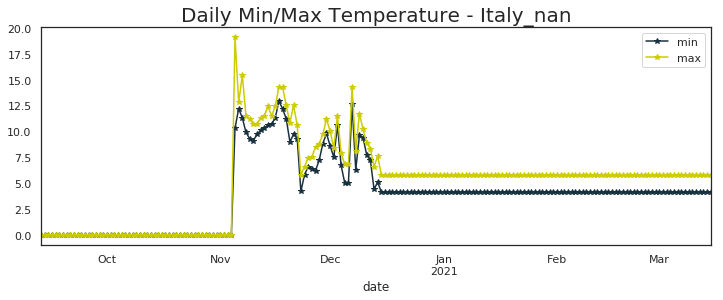

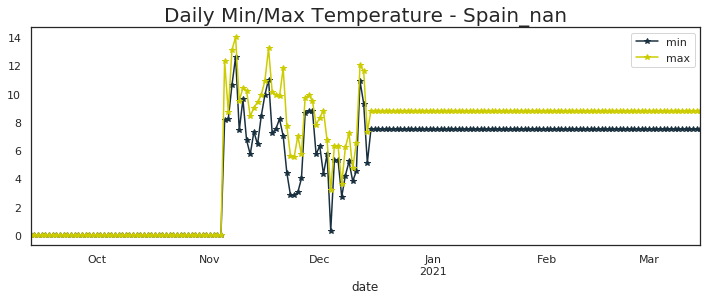

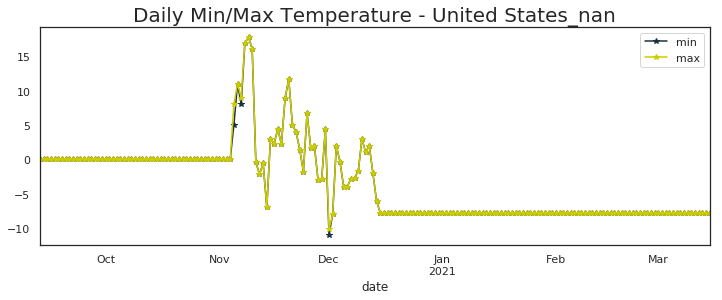

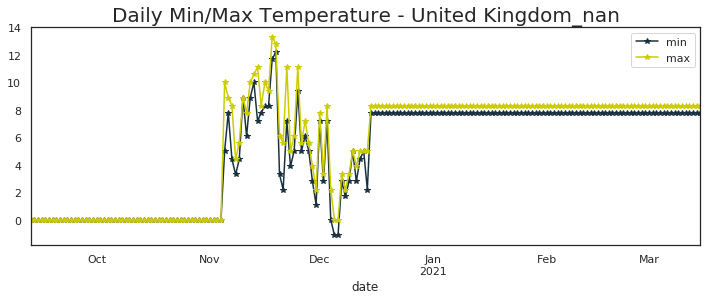

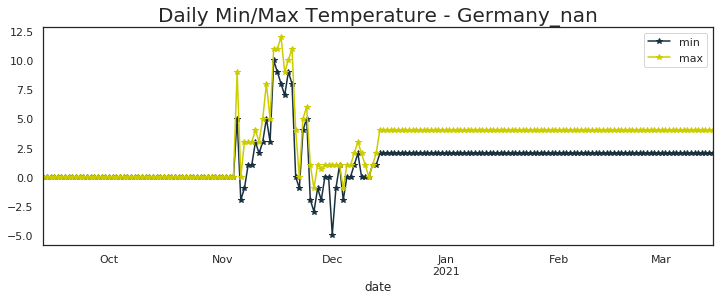

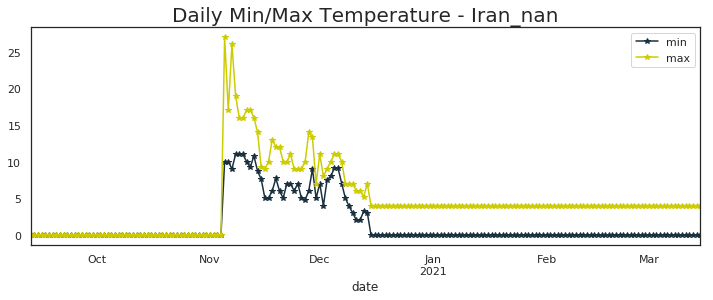

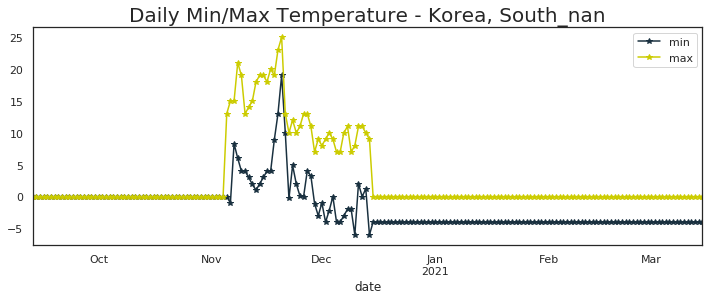

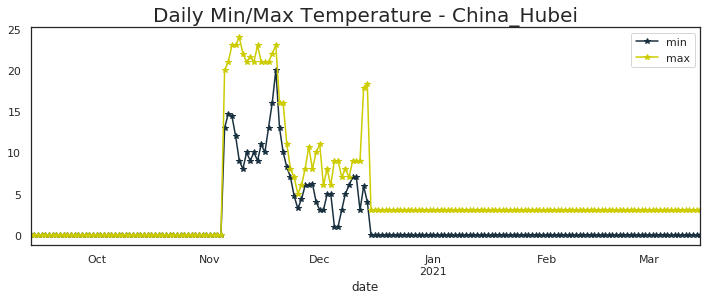

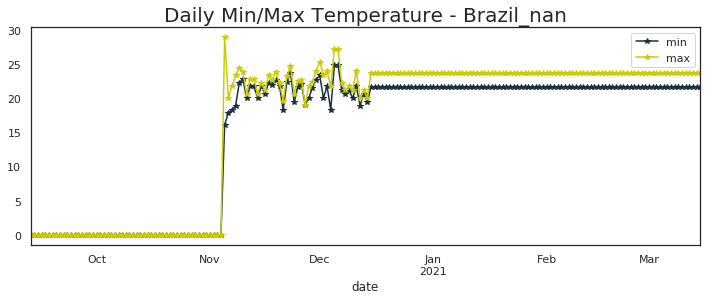

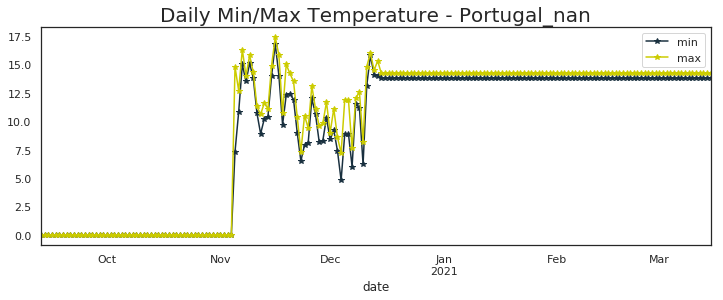

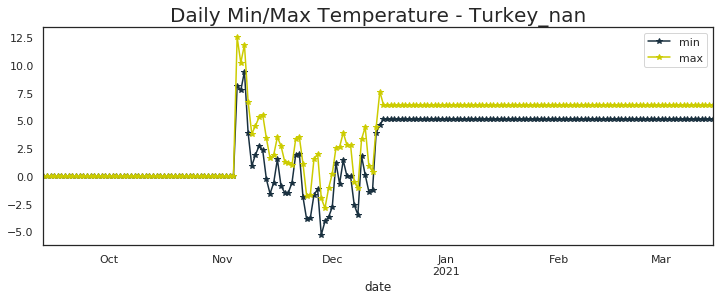

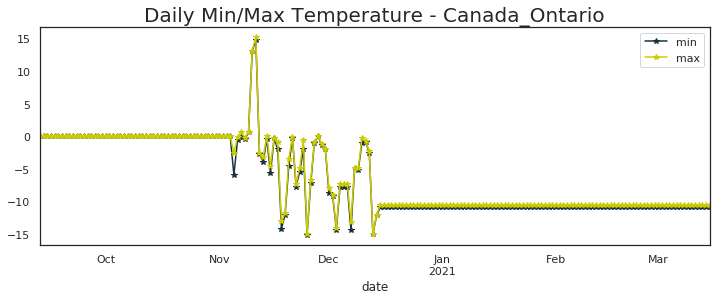

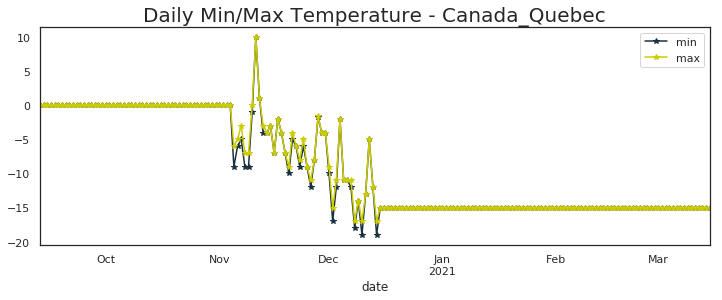

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
Brazil_nan                  24.8  28.9
India_nan                   22.0  31.0
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
France_nan                  12.1  13.3
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Turkey_nan                   9.4  12.5
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
South Africa_nan             0.0   0.0
Ukraine_nan                  0.0   0.0
Indonesia_nan                0.0   0.0
Peru_nan                    24.6  29.9
Czechia_nan                  0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

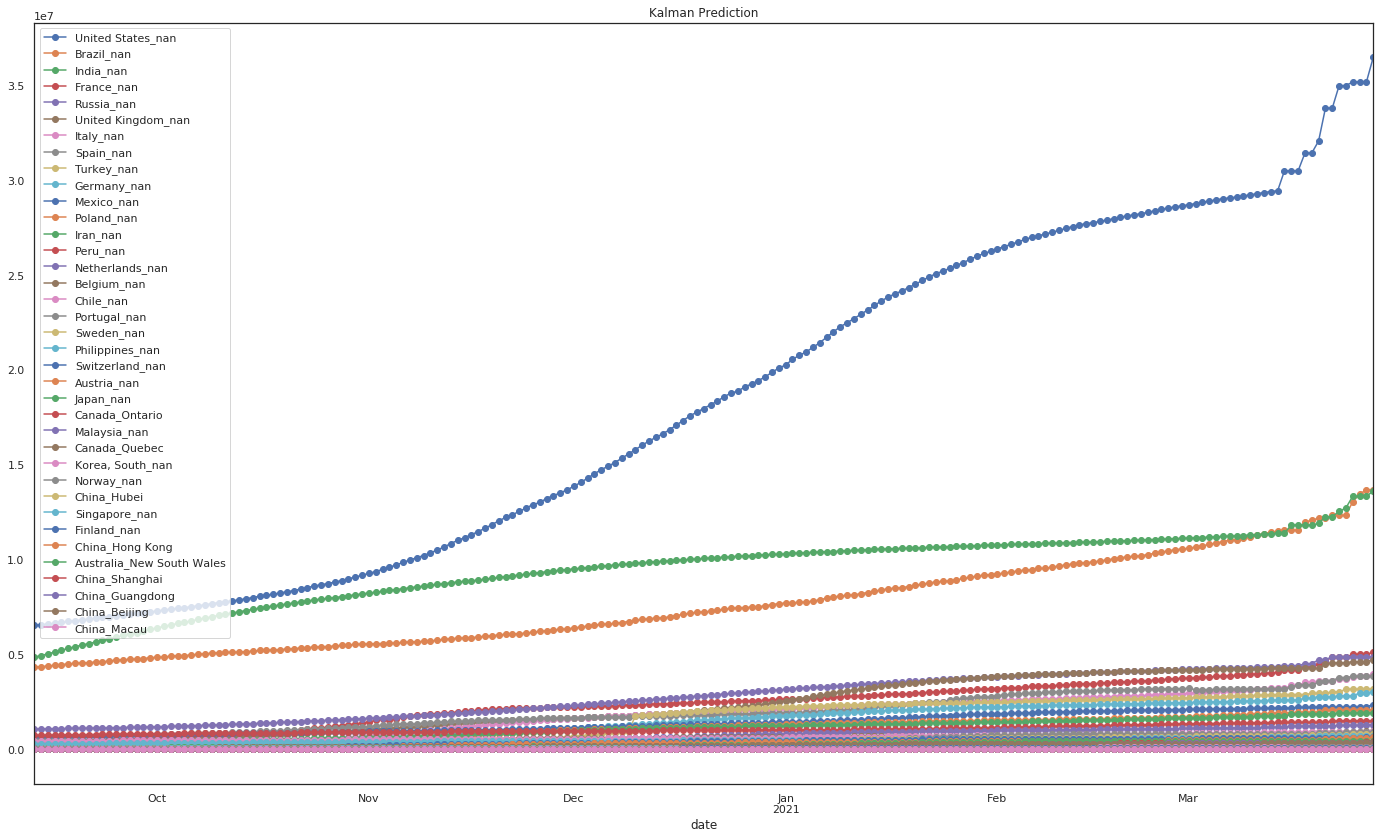

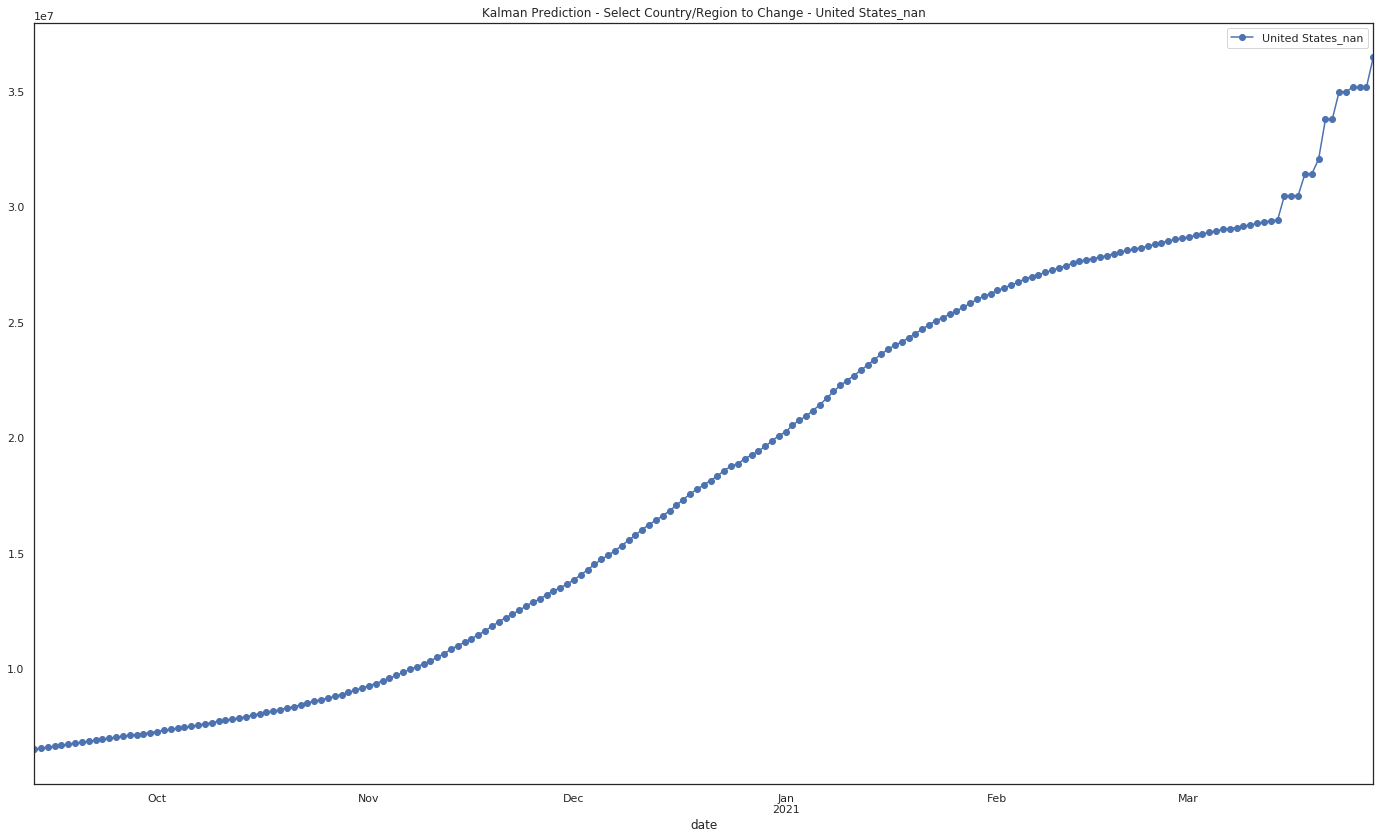

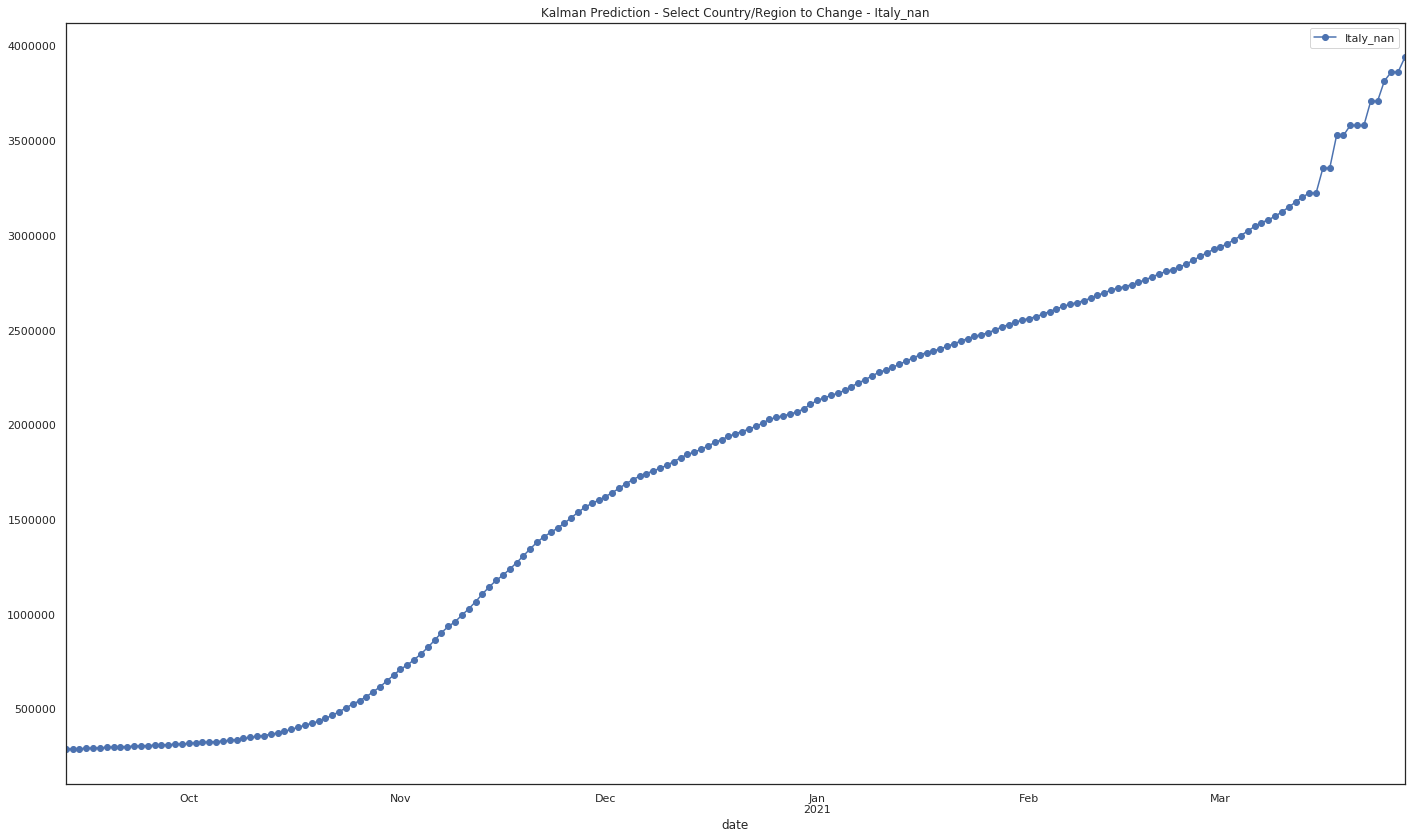

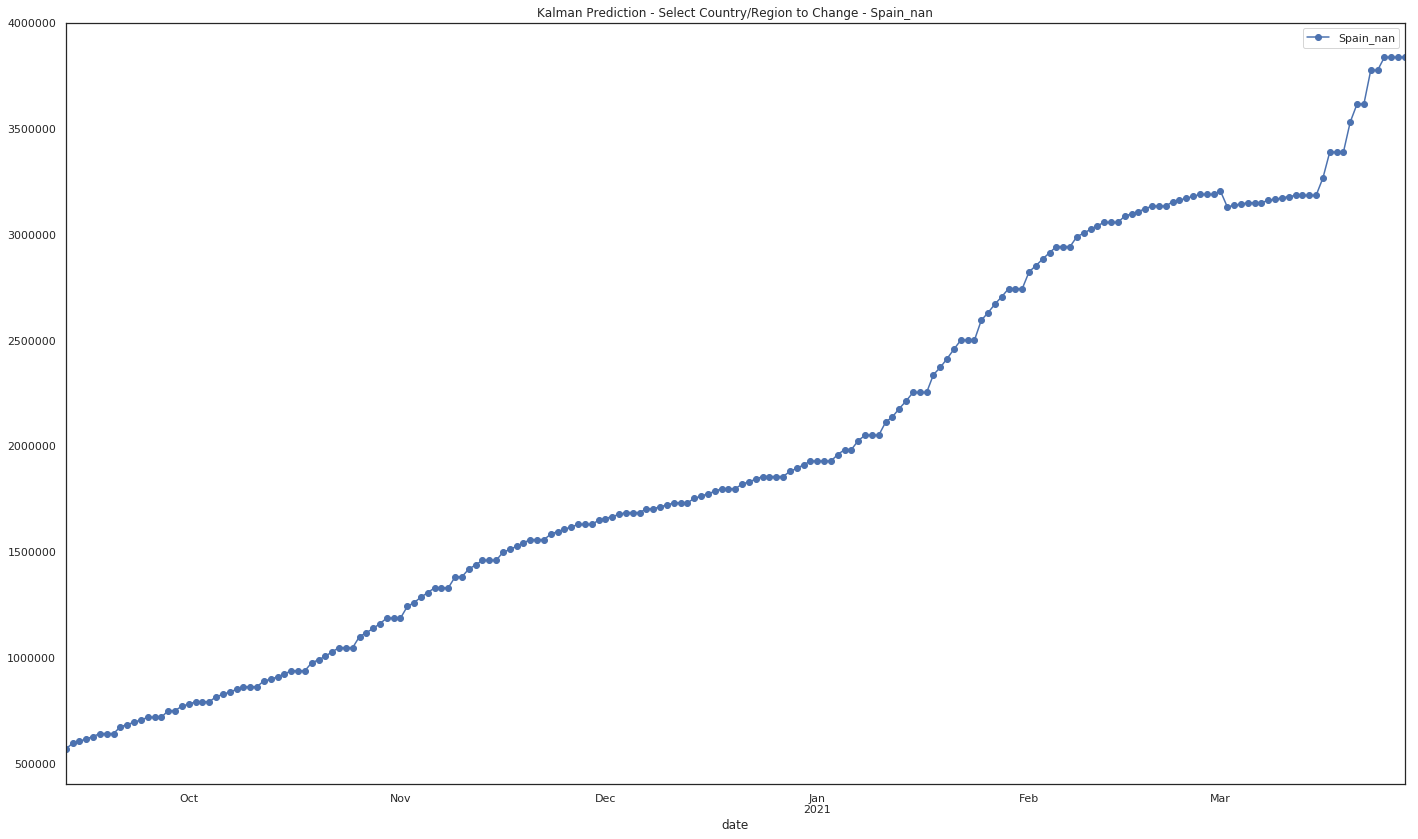

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


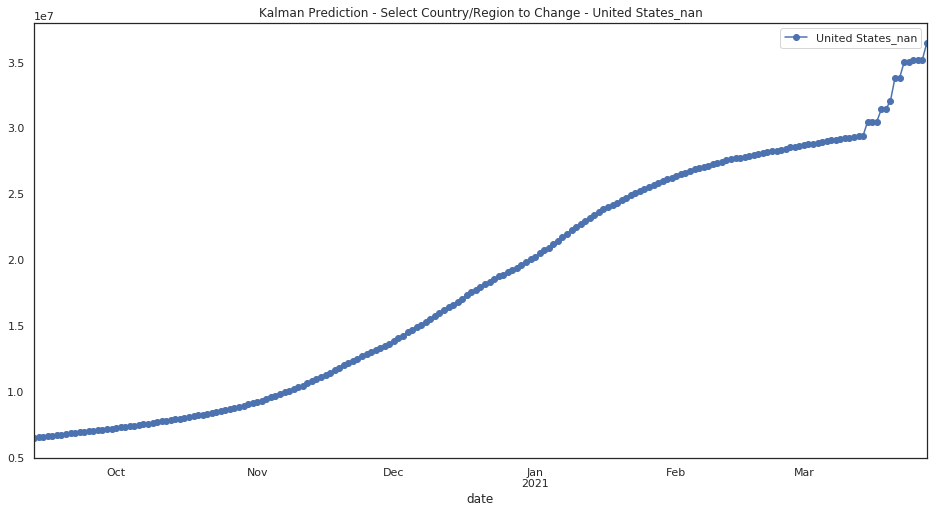

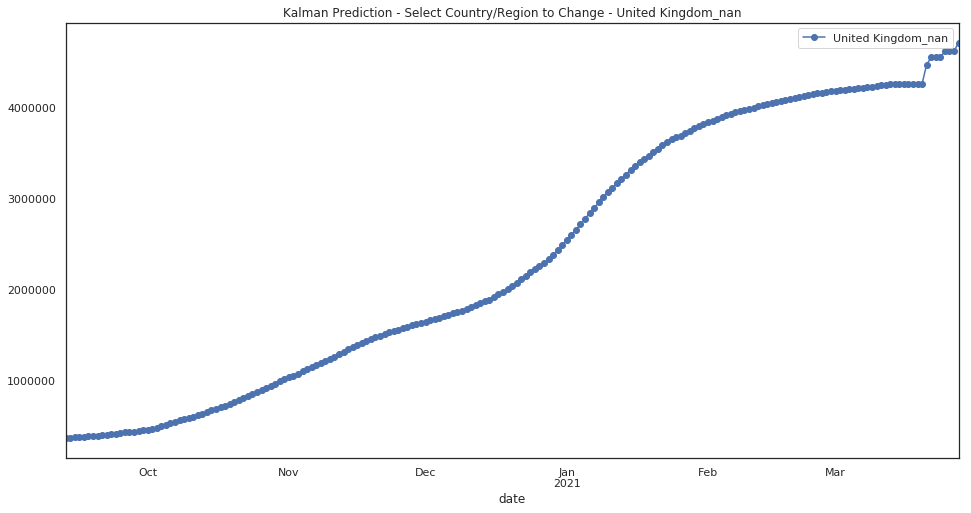

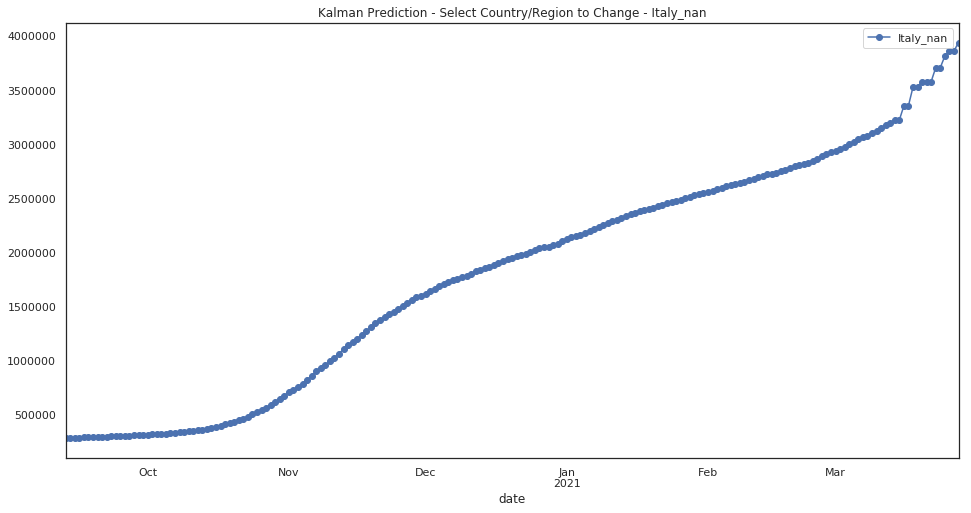

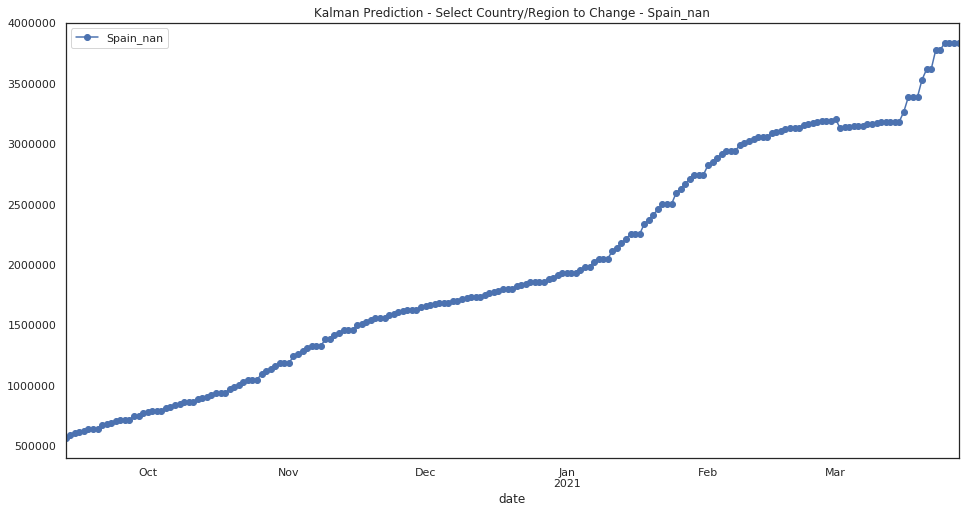

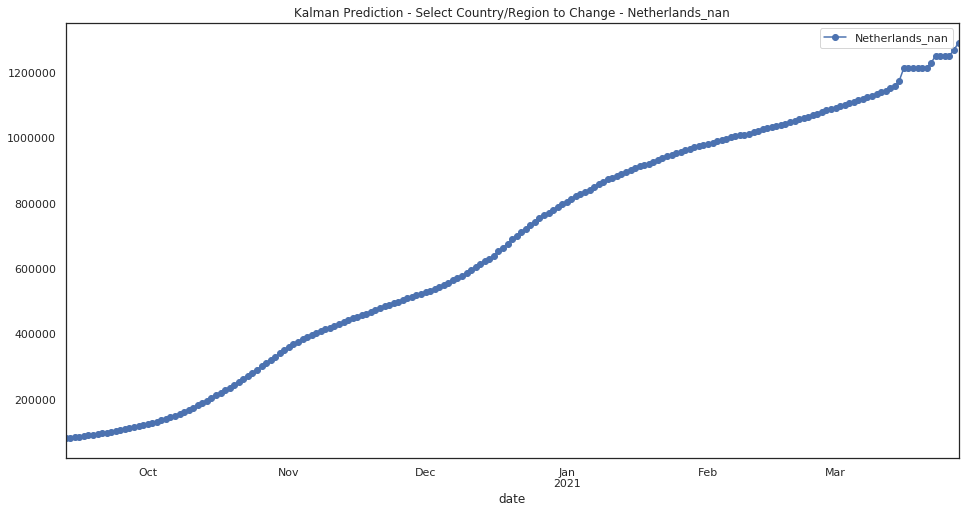

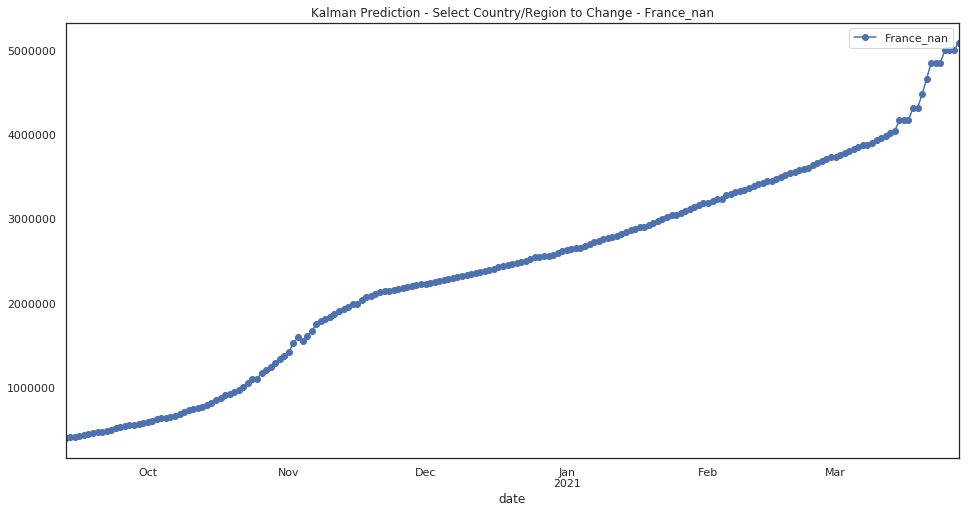

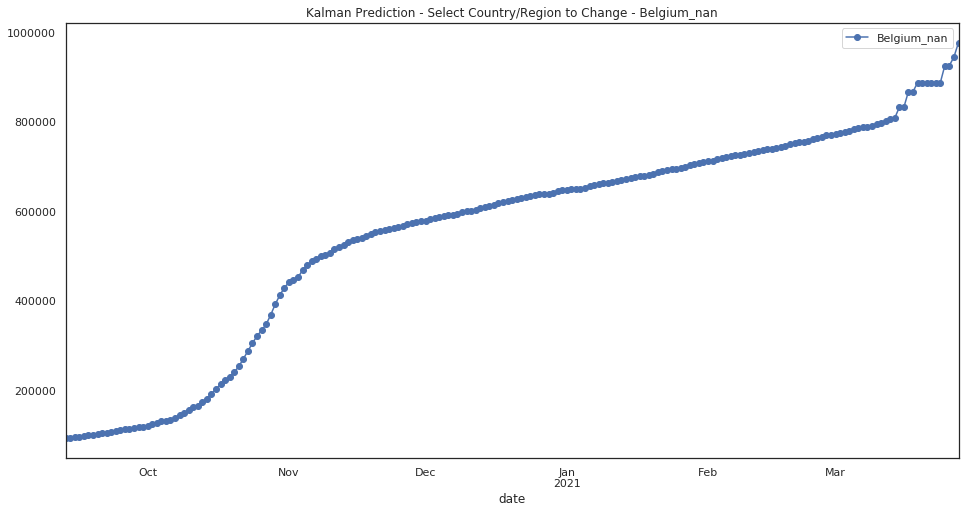

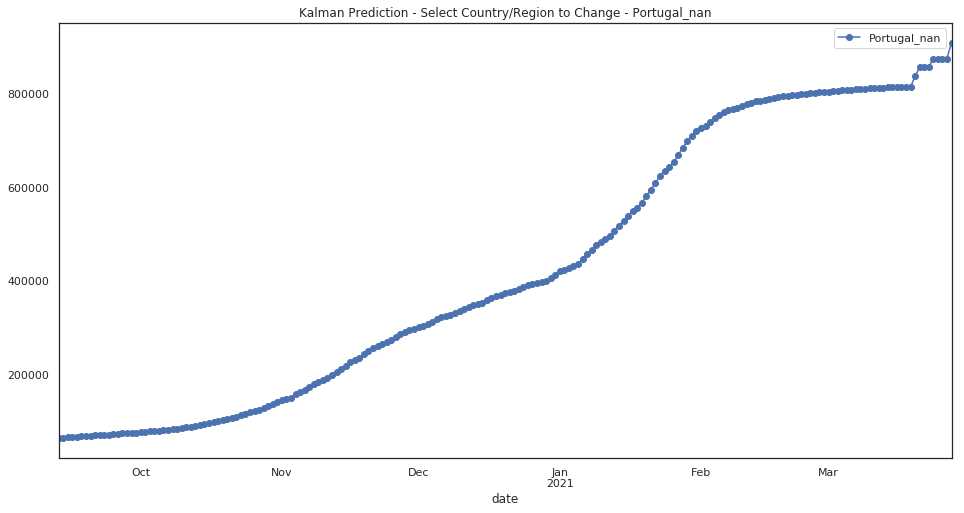

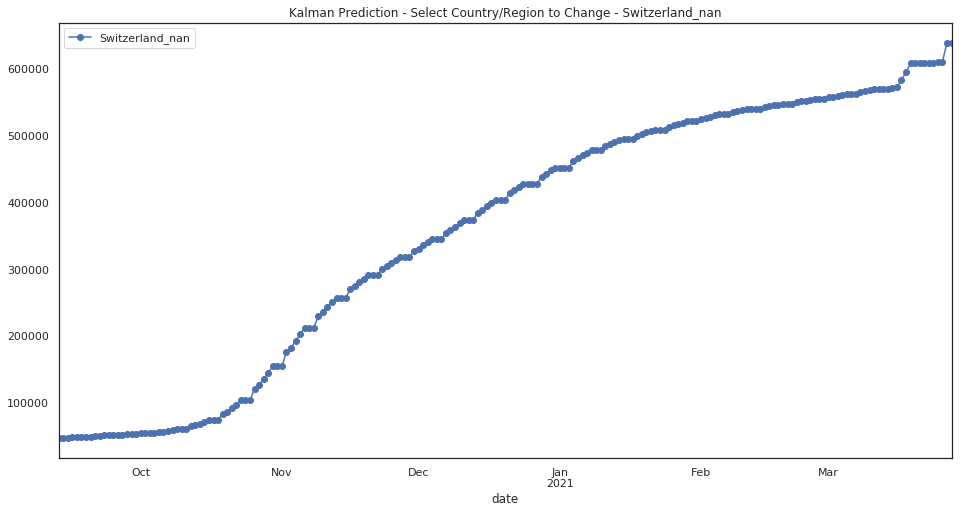

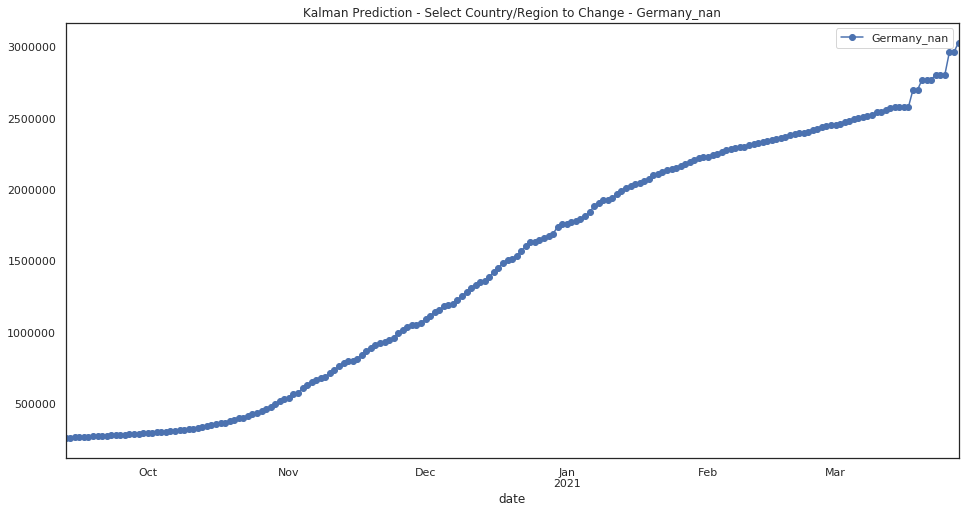

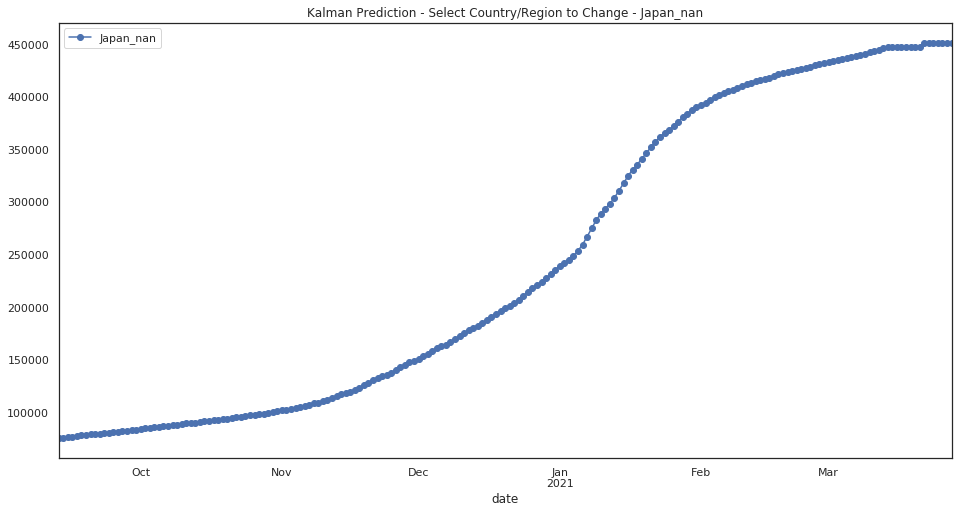

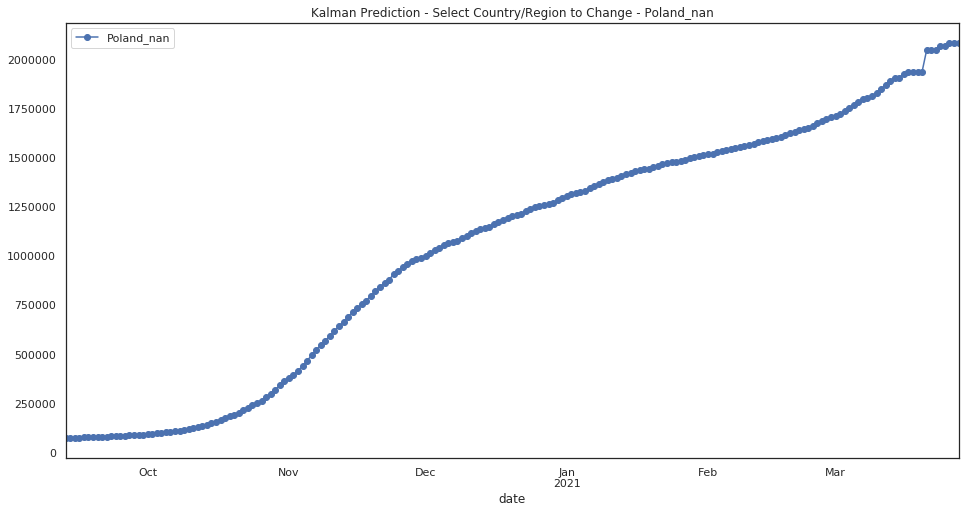

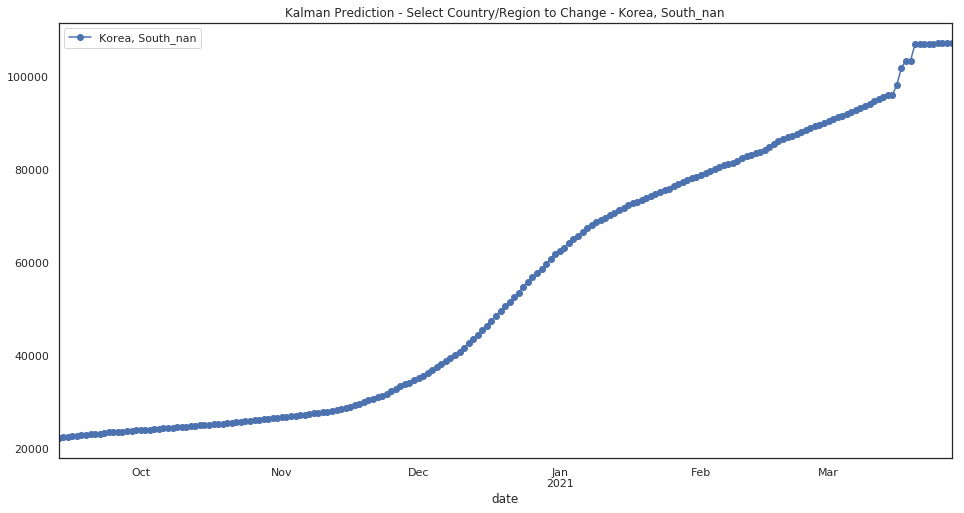

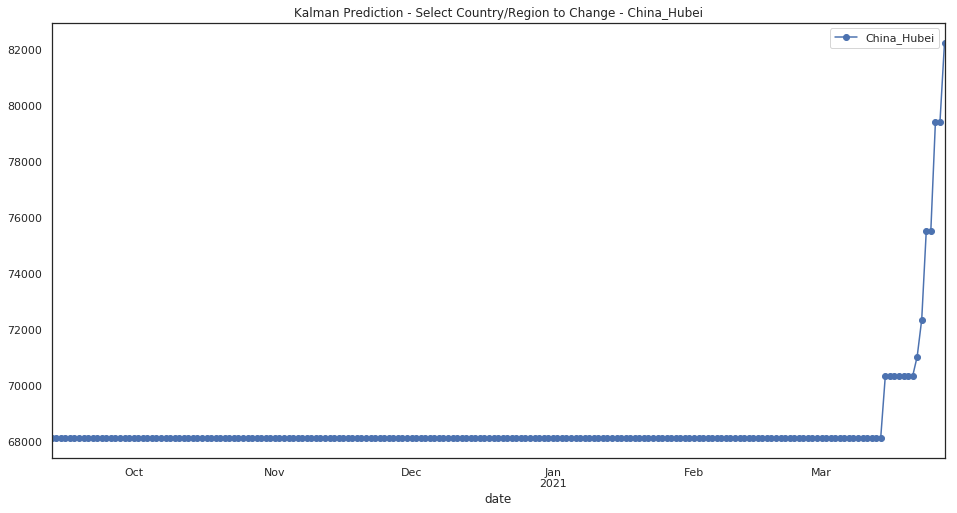

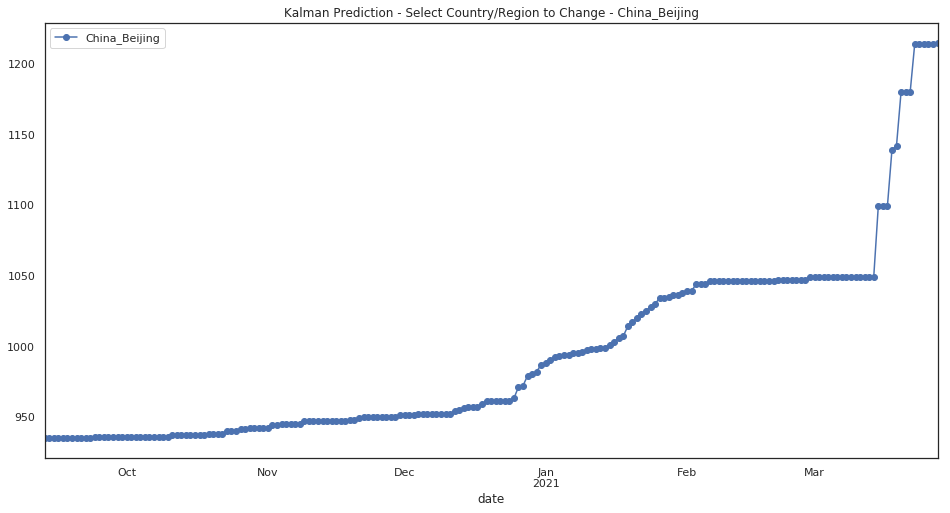

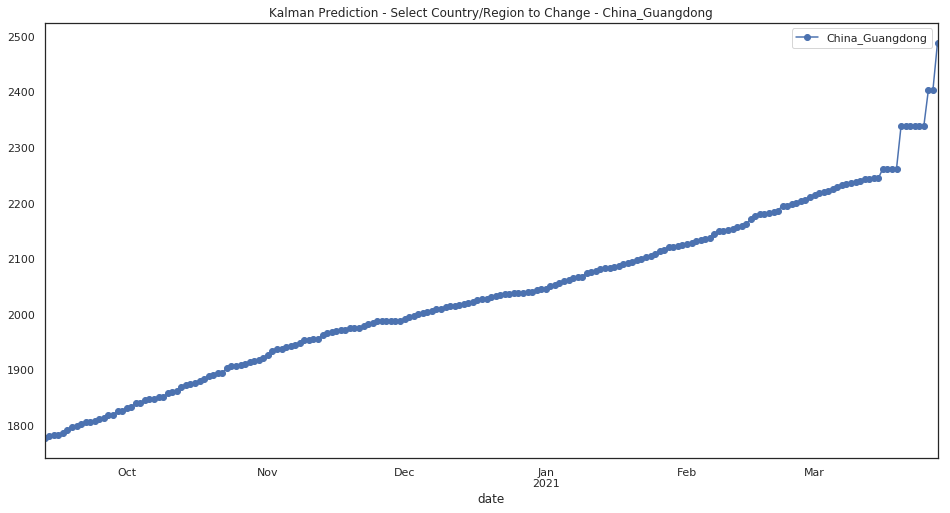

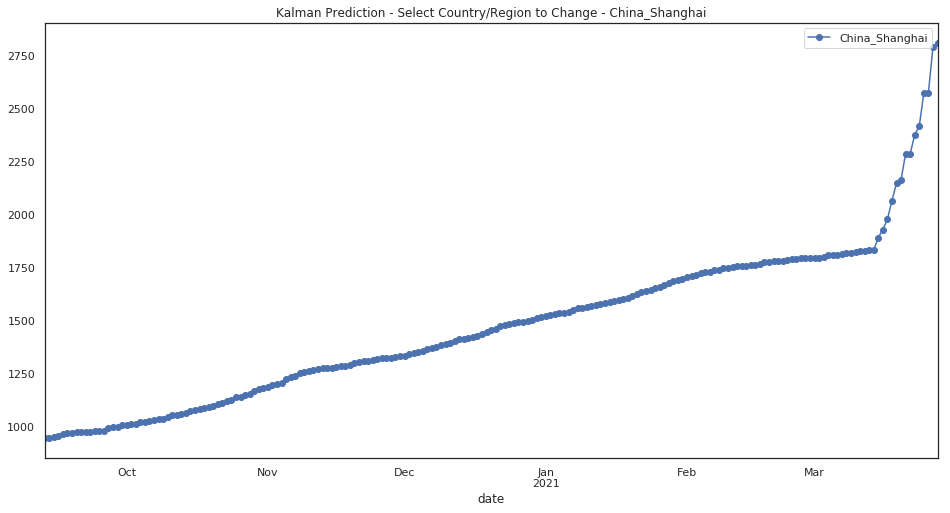

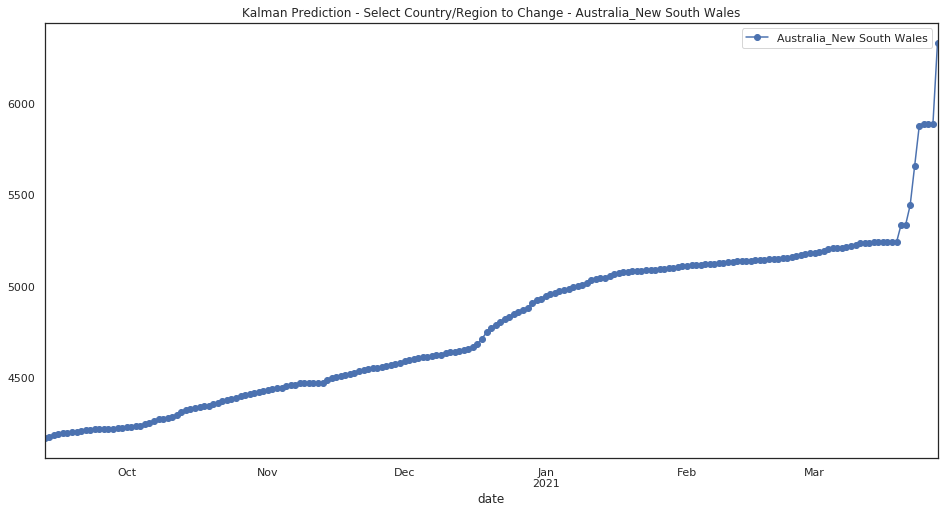

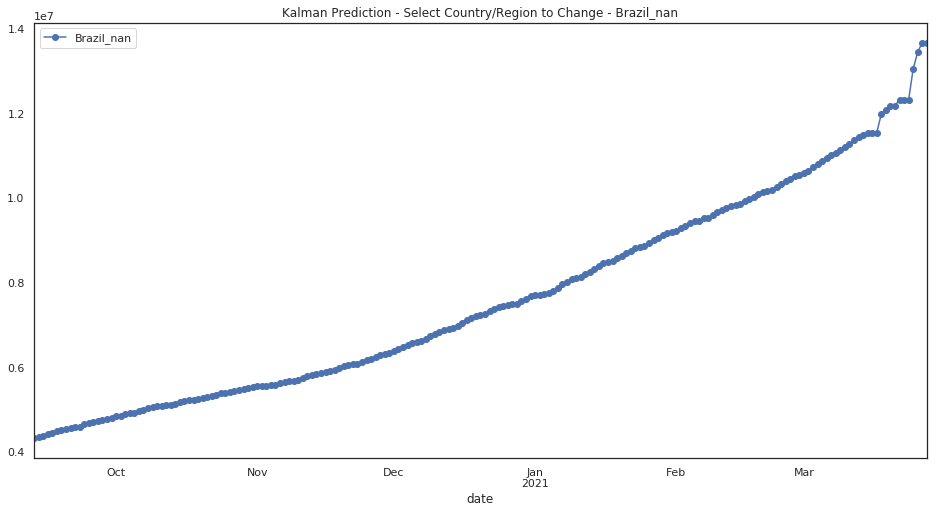

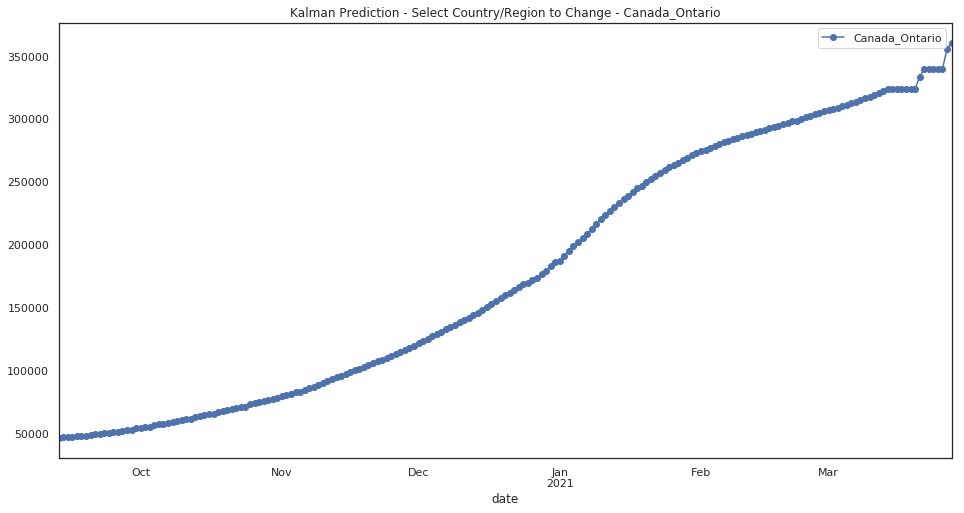

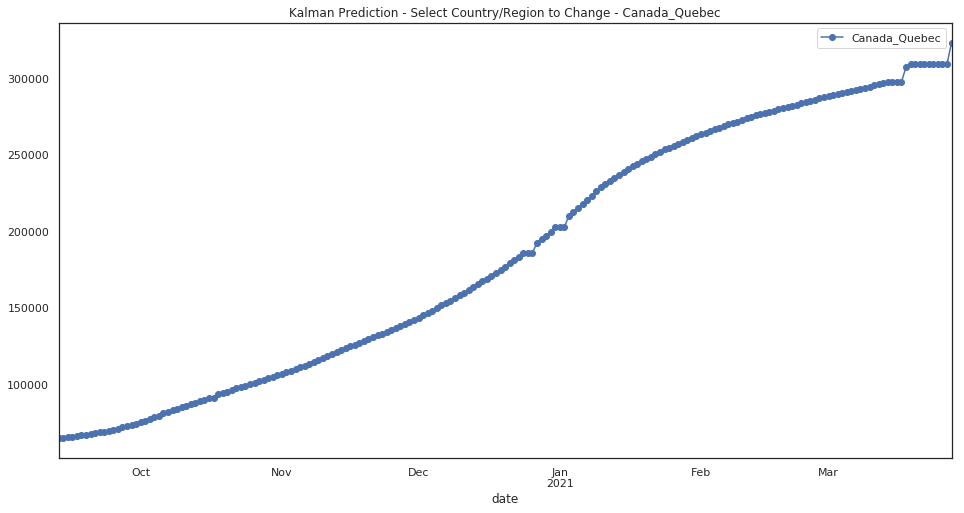

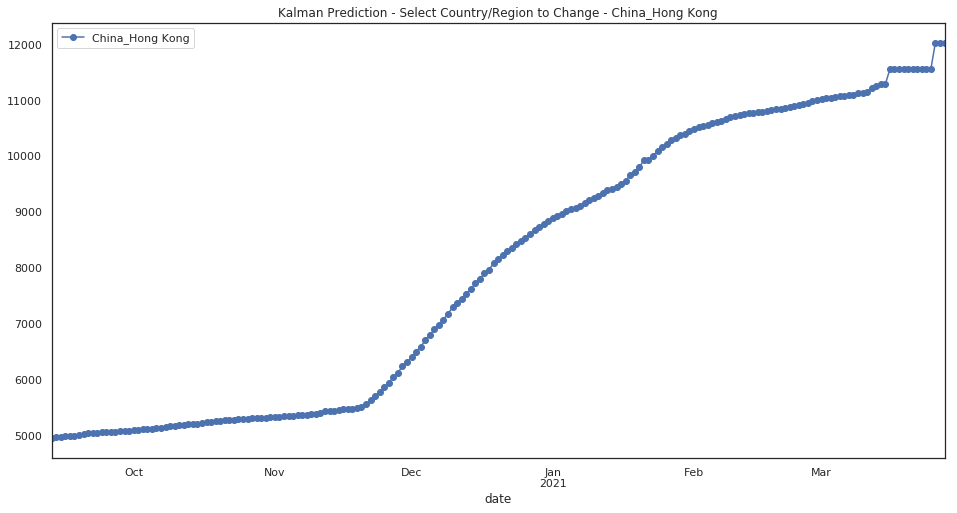

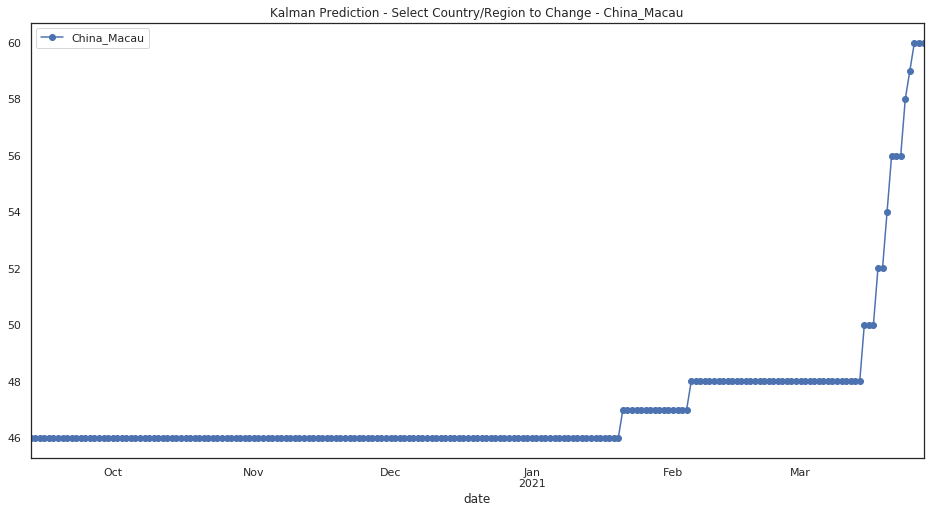

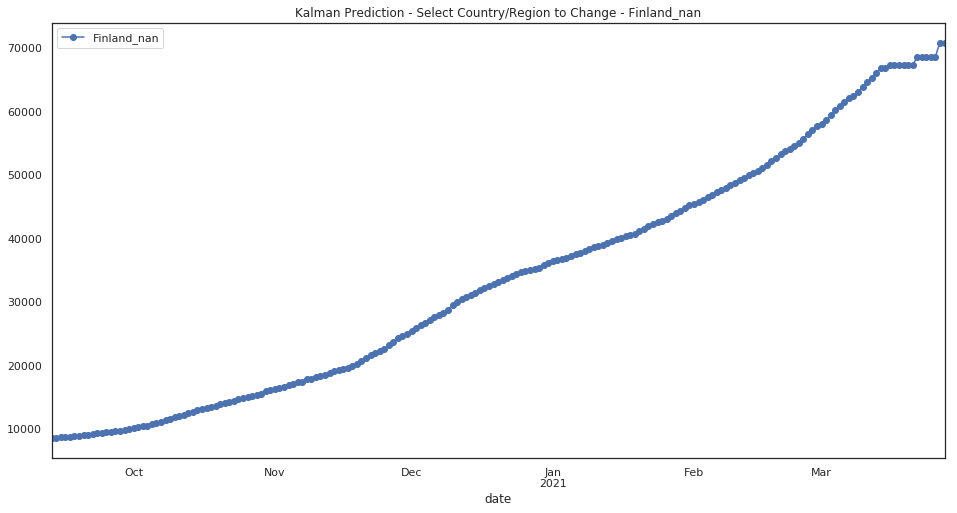

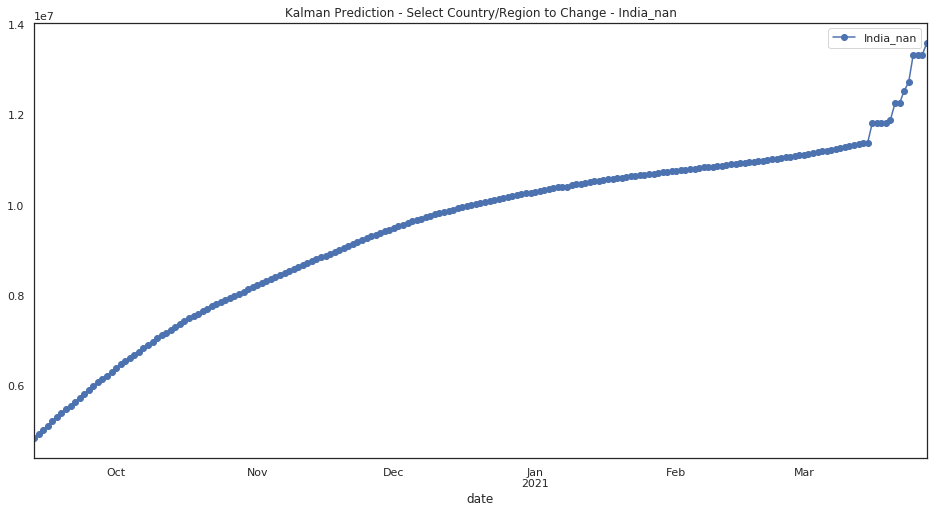

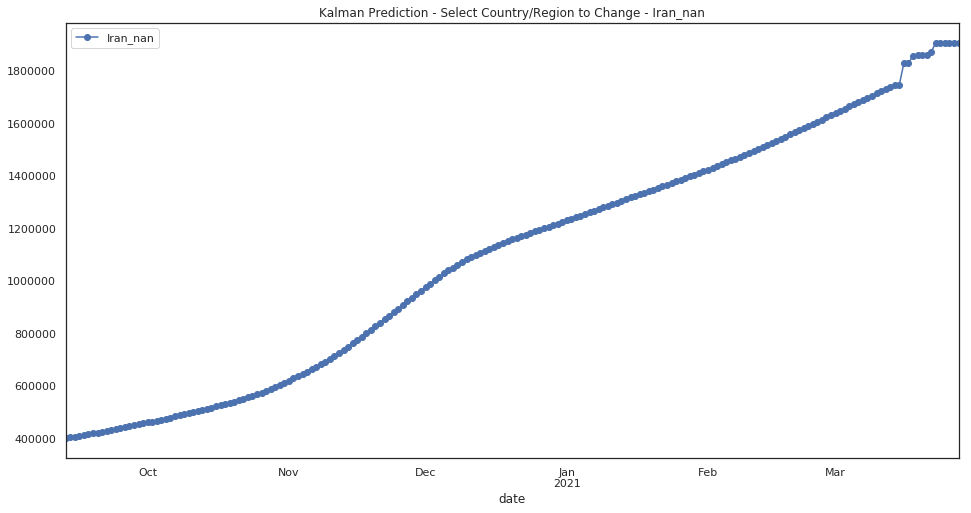

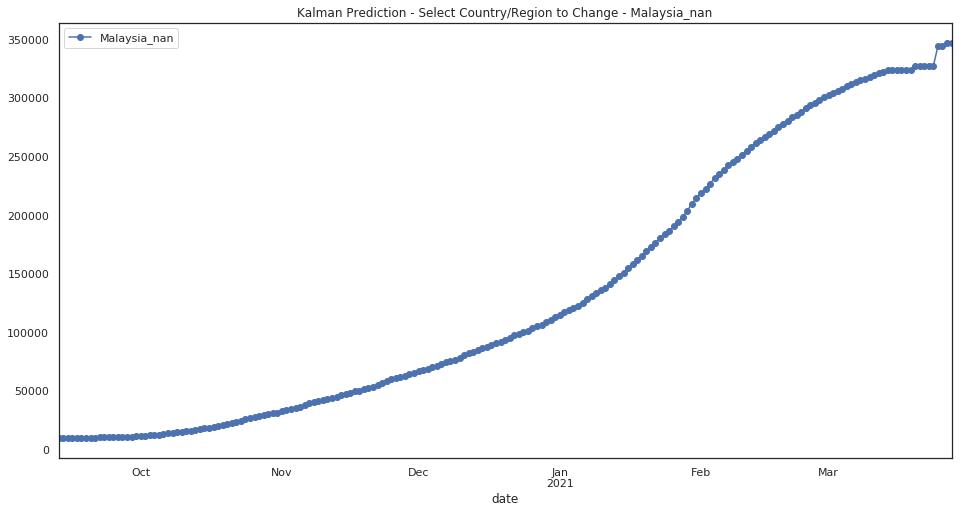

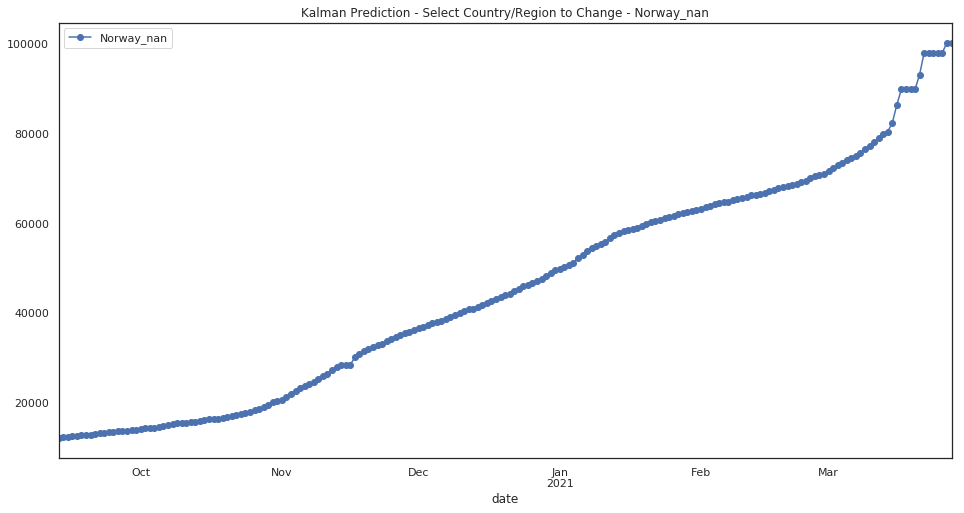

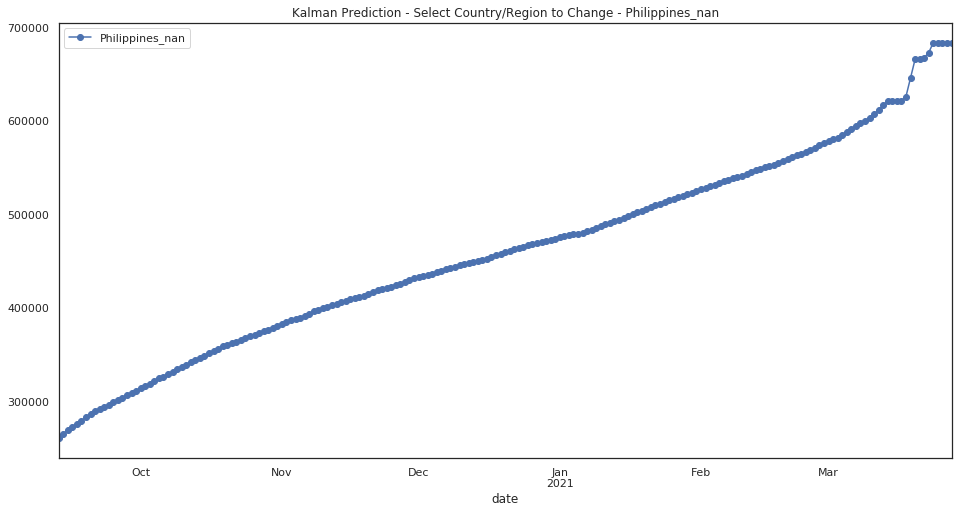

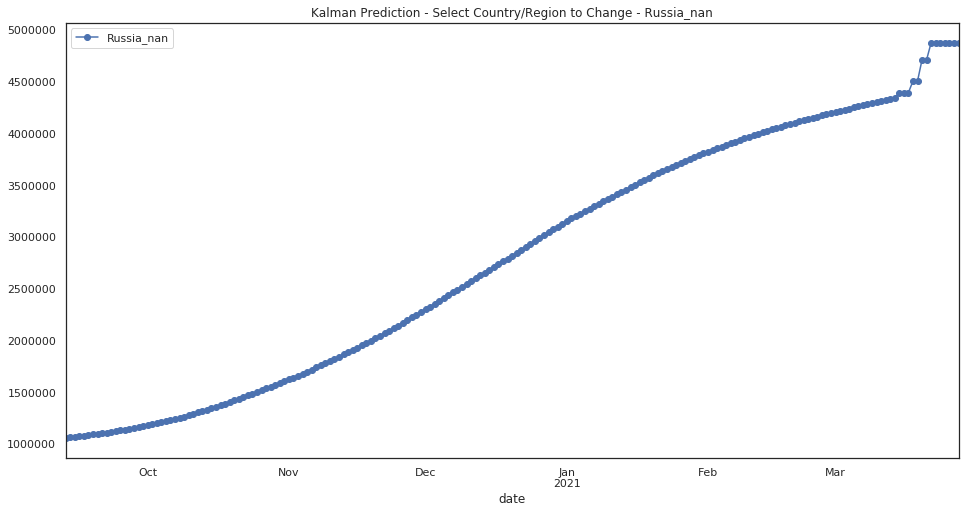

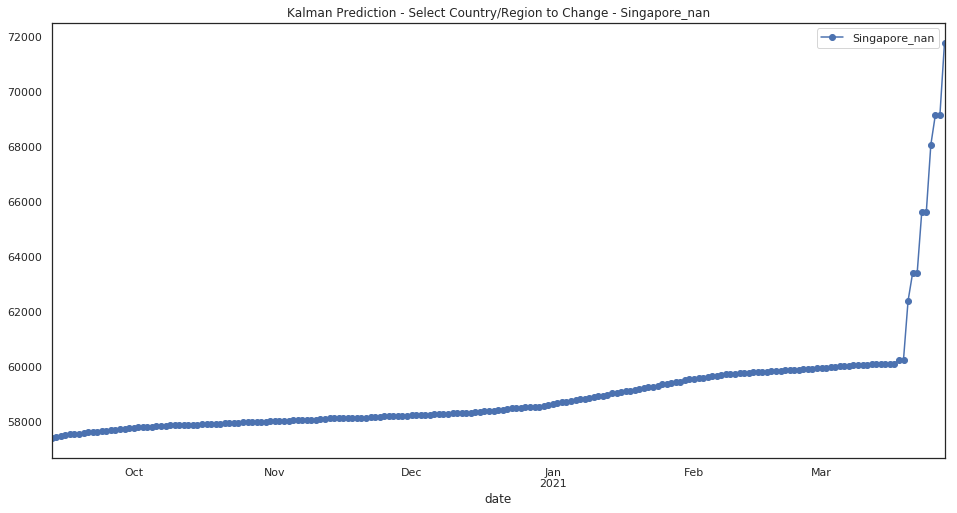

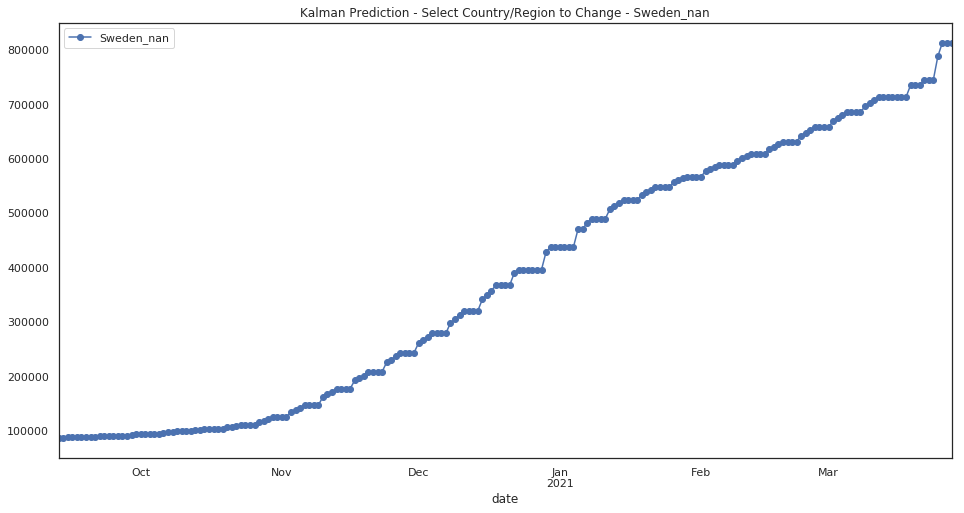

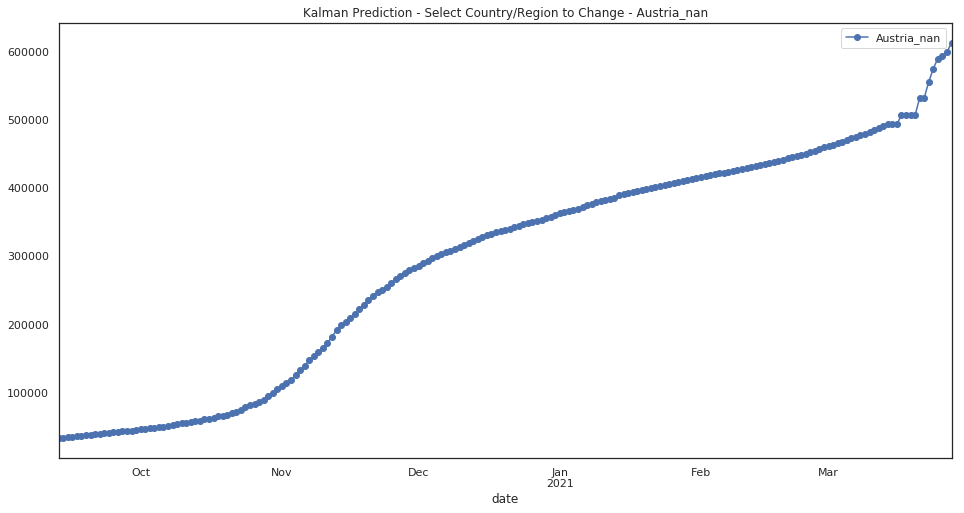

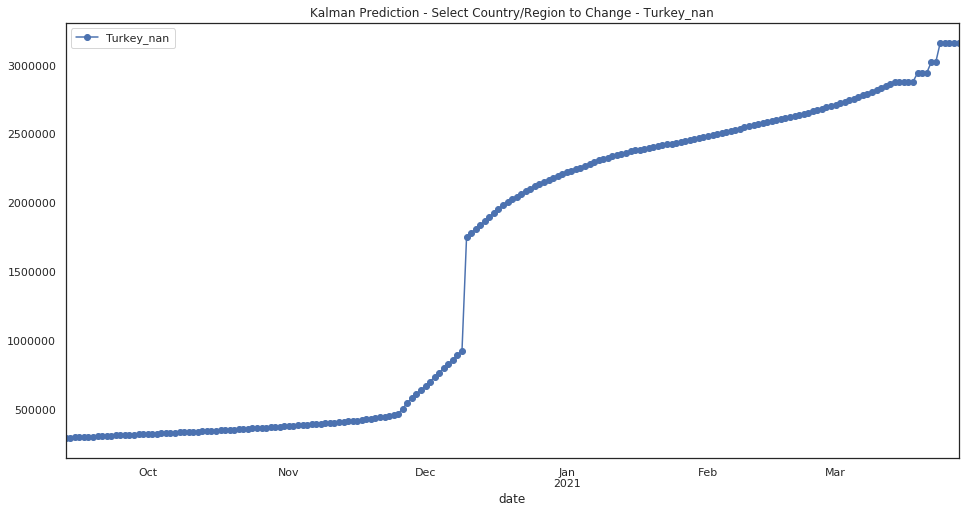

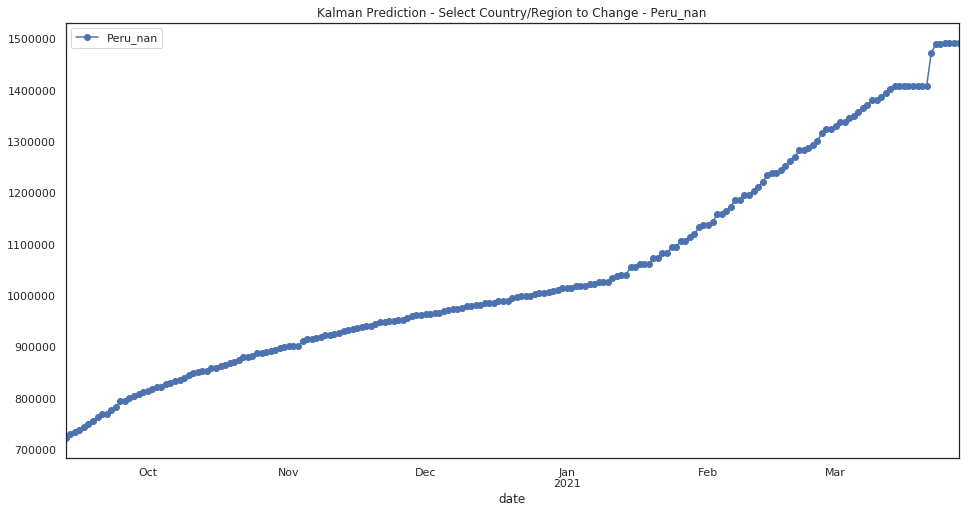

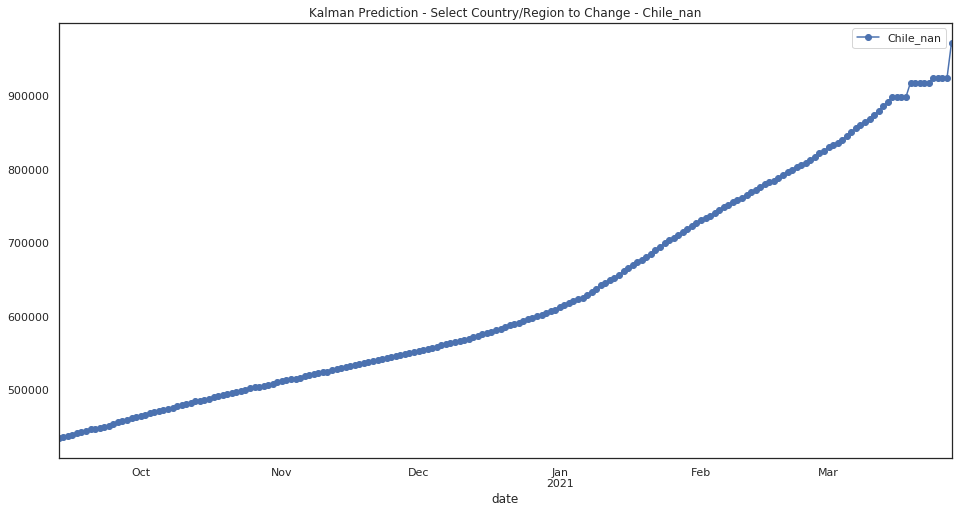

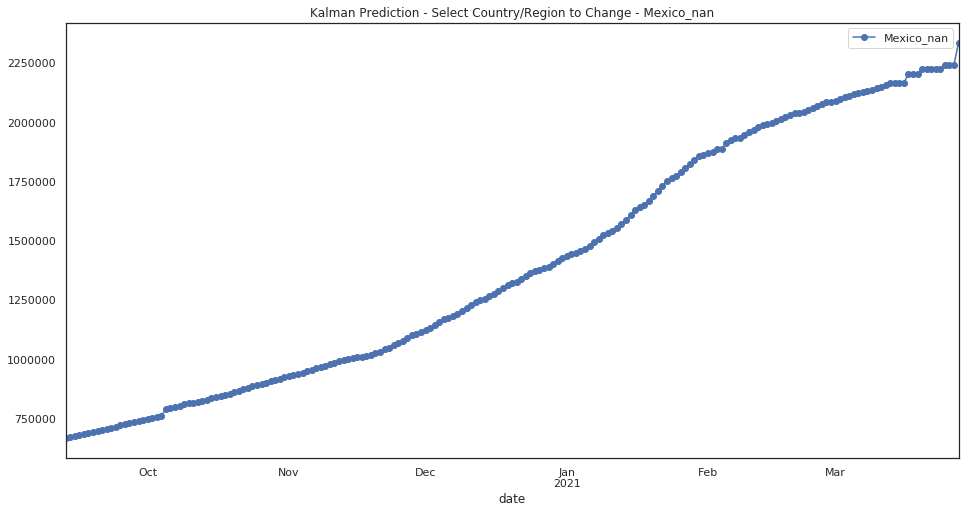

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-03-28 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      36480484.0
Brazil_nan                                          NaN      13668952.0
India_nan                                           NaN      13603503.0
France_nan                                          NaN       5095504.0
Russia_nan                                          NaN       4879296.0
United Kingdom_nan                                  NaN       4712134.0
Italy_nan                                           NaN       3940132.0
Spain_nan                                           NaN       3836915.0
Turkey_nan                                          NaN       3164014.0
Germany_nan                                         NaN       3030320.0
Colombia_nan                                        NaN       2872819.0
Argentina_nan                                       NaN       2494017.0
Mexico_nan                                          NaN       2336498.0
Poland_nan                                          NaN       2084146.0
South Africa_nan                                    NaN       2069655.0
Iran_nan                                            NaN       1908314.0
Ukraine_nan                                         NaN       1612991.0
Czechia_nan                                         NaN       1610700.0
Indonesia_nan                                       NaN       1556527.0
Peru_nan                                            NaN       1492703.0
Netherlands_nan                                     NaN       1291452.0
Belgium_nan                                         NaN        977010.0
Chile_nan                                           NaN        972069.0
Israel_nan                                          NaN        935687.0
Romania_nan                                         NaN        926640.0
Portugal_nan                                        NaN        909928.0
Sweden_nan                                          NaN        813155.0
Pakistan_nan                                        NaN        768361.0
Iraq_nan                                            NaN        766979.0
Philippines_nan                                     NaN        683767.0
...                                                 ...             ...
United Kingdom_British Virgin Islands               NaN           166.0
Canada_Prince Edward Island                         NaN           154.0
Australia_Northern Territory                        NaN           152.0
Australia_Australian Capital Territory              NaN           141.0
France_New Caledonia                                NaN           120.0
China_Ningxia                                       NaN            92.0
Fiji_nan                                            NaN            87.0
Canada_Yukon                                        NaN            80.0
United Kingdom_Falkland Islands (Malvinas)          NaN            64.0
China_Macau                                         NaN            60.0
Canada_Northwest Territories                        NaN            55.0
Laos_nan                                            NaN            52.0
Saint Kitts and Nevis_nan                           NaN            47.0
Denmark_Greenland                                   NaN            37.0
United Kingdom_Anguilla                             NaN            31.0
Holy See_nan                                        NaN            28.0
France_Saint Pierre and Miquelon                    NaN            27.0
United Kingdom_Montserrat                           NaN            25.0
China_Qinghai                                       NaN            19.0
Solomon Islands_nan                                 NaN            18.0
Canada_Grand Princess                               NaN            16.0
Canada_Repatriated Travellers                       NaN            13.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          54981.0      31403.0      63200.0      22779.0   
2020-09-14          55029.0      31547.0      63408.0      22860.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48984.0       1483.0   
2020-09-18          38872.0      11948.0      49203.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39236.0      12525.0      50140.0       1994.0   
2020-09-22          39275.0      12680.0      50333.0       1681.0   
2020-09-23          39322.0      12828.0      50521.0       2109.0   
2020-09-24          39339.0      12969.0      50702.0       1753.0   
2020-09-25          39359.0      13074.0      50879.0       2135.0   
2020-09-26          39368.0      13198.0      51042.0       1836.0   
2020-09-27          39397.0      13326.0      51197.0       2150.0   
2020-09-28          39414.0      13455.0      51345.0       2262.0   
2020-09-29          39432.0      13551.0      51499.0       1966.0   
2020-09-30          39447.0      13693.0      51662.0       2392.0   
2020-10-01          39464.0      13847.0      51825.0       2050.0   
2020-10-02          39471.0      13977.0      51984.0       2401.0   
2020-10-03          39479.0      14134.0      52135.0       2110.0   
2020-10-04          39517.0      14297.0      52276.0       2377.0   
2020-10-05          39590.0      14444.0      52411.0       2601.0   
2020-10-06          39654.0      14605.0      52539.0       2370.0   
2020-10-07          39721.0      14751.0      52661.0       2994.0   
2020-10-08          39788.0      14917.0      52797.0       2568.0   
2020-10-09          39859.0      15082.0      52944.0       3069.0   
2020-10-10          39874.0      15253.0      53084.0       2696.0   
2020-10-11          39962.0      15425.0      53218.0       3028.0   
2020-10-12          40025.0      15593.0      53454.0       3285.0   
...                     ...          ...          ...          ...   
2021-02-28          55891.0     107152.0     113237.0      10879.0   
2021-03-01          55909.0     107946.0     113390.0      10917.0   
2021-03-02          55934.0     108783.0     113570.0      10926.0   
2021-03-03          55949.0     109673.0     113740.0      10968.0   
2021-03-04          55955.0     110514.0     113907.0      10966.0   
2021-03-05          55999.0     111317.0     114093.0      11010.0   
2021-03-06          56020.0     112079.0     114259.0      11042.0   
2021-03-07          56026.0     112900.0     114384.0      11062.0   
2021-03-08          56052.0     113619.0     114520.0      11084.0   
2021-03-09          56054.0     114221.0     114683.0      11099.0   
2021-03-10          56069.0     114845.0     114828.0      11148.0   
2021-03-11          56093.0     115453.0     114990.0      11130.0   
2021-03-12          56131.0     116125.0     115158.0      11245.0   
2021-03-13          56141.0     116850.0     115295.0      11199.0   
2021-03-14          56161.0     117523.0     115414.0      11273.0   
2021-03-15          56165.0     117615.0     119214.0      11271.0   
2021-03-16          56162.0     117474.0     120915.0      11365.0   
2021-03-17          56162.0     117474.0     121357.0      11745.0   
2021-03-18          56483.0     117474.0     122085.0      11848.0   
2021-03-19          56558.0     121806.0     121473.0      12233.0   
2021-03-20          56546.0     125209.0     121970.0      12893.0   
2021-03-21          57378.0     125856.0     122189.0      12780.0   
2021-03-22          59218.0     130017.0     128251.0      12984.0   
2021-03-23          61051.0     131183.0     131471.0      12916.0   
2021-03-24

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'France_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Italy_nan',
 'Spain_nan',
 'Turkey_nan',
 'Germany_nan',
 'Colombia_nan',
 'Argentina_nan',
 'Mexico_nan',
 'Poland_nan',
 'South Africa_nan',
 'Iran_nan',
 'Ukraine_nan',
 'Czechia_nan',
 'Indonesia_nan',
 'Peru_nan',
 'Netherlands_nan',
 'Belgium_nan',
 'Chile_nan',
 'Israel_nan',
 'Romania_nan',
 'Portugal_nan',
 'Sweden_nan',
 'Pakistan_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Switzerland_nan',
 'Bangladesh_nan',
 'Austria_nan',
 'Hungary_nan',
 'Serbia_nan',
 'Jordan_nan',
 'Morocco_nan',
 'Lebanon_nan',
 'Japan_nan',
 'United Arab Emirates_nan',
 'Saudi Arabia_nan',
 'Panama_nan',
 'Canada_Ontario',
 'Ecuador_nan',
 'Slovakia_nan',
 'Malaysia_nan',
 'Belarus_nan',
 'Nepal_nan',
 'Canada_Quebec',
 'Georgia_nan',
 'Bulgaria_nan',
 'Kazakhstan_nan',
 'Dominican Republic_nan',
 'Croatia_nan',
 'Costa Rica_nan',
 'Tunisia_nan',
 'Bolivia_nan',
 'Azerbaijan_nan',
 'Ireland_nan',
 '

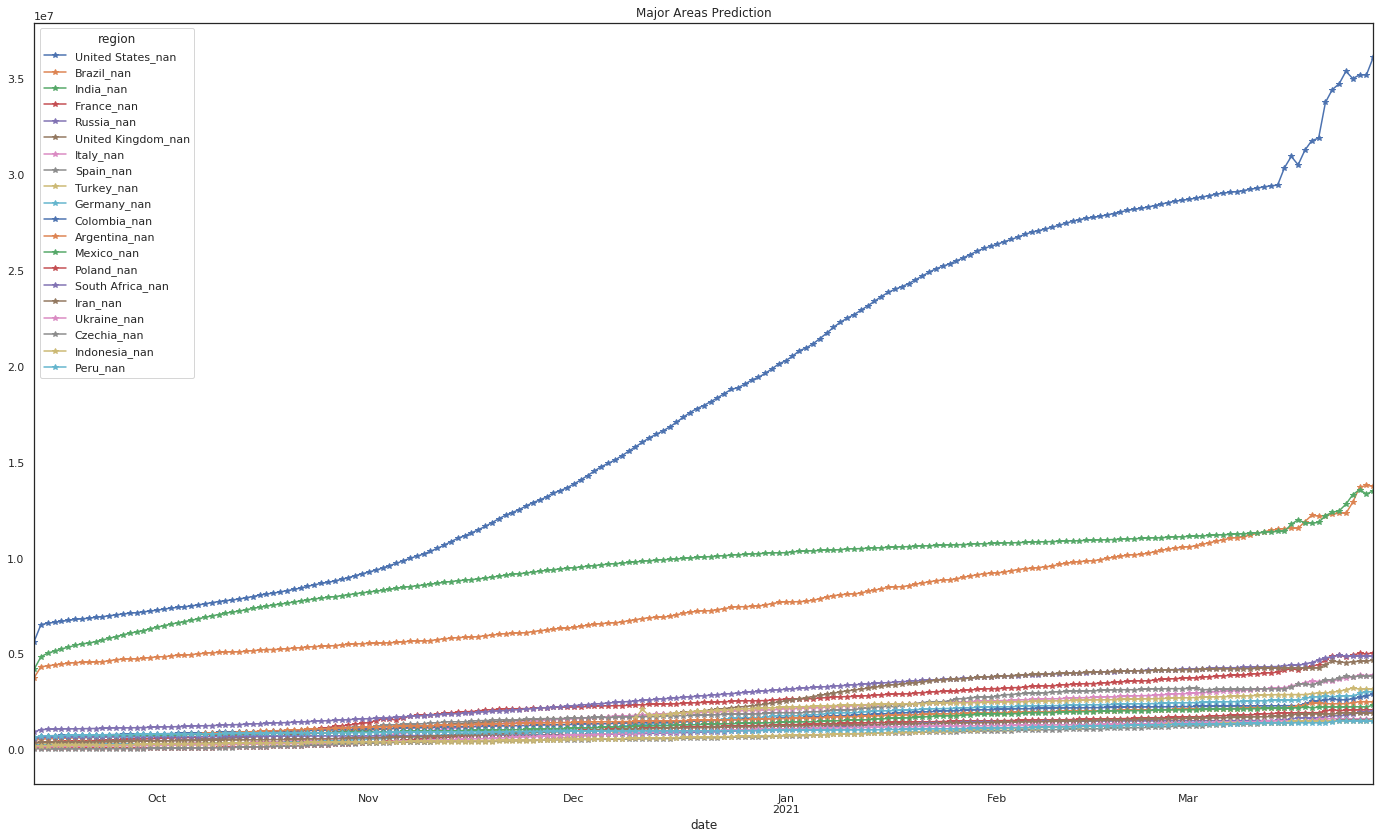

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

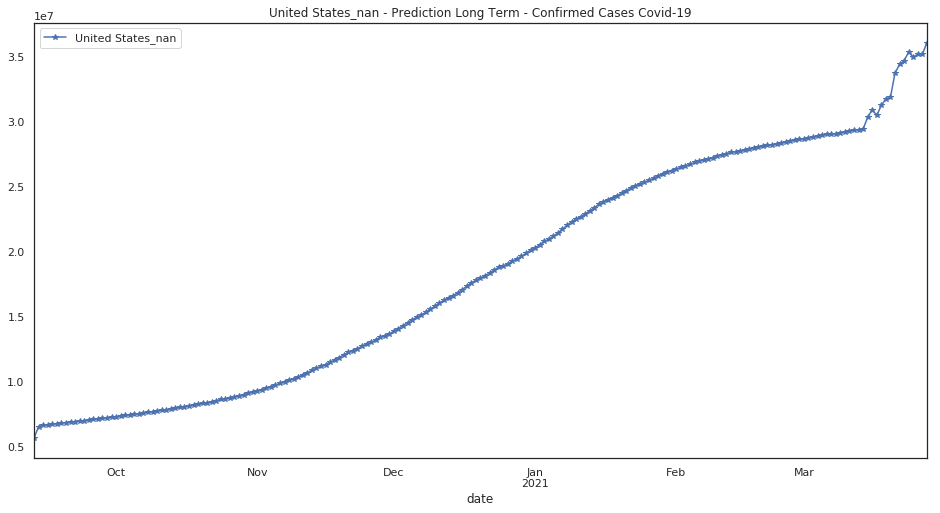

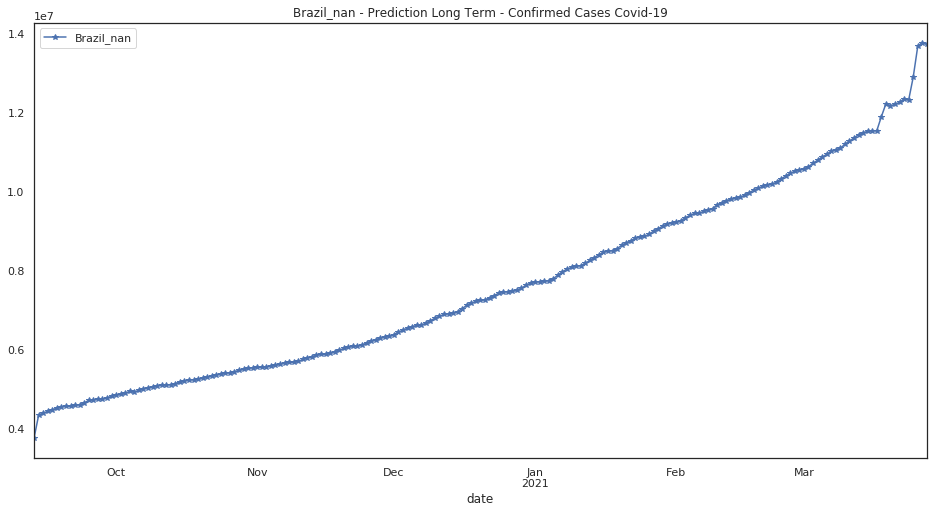

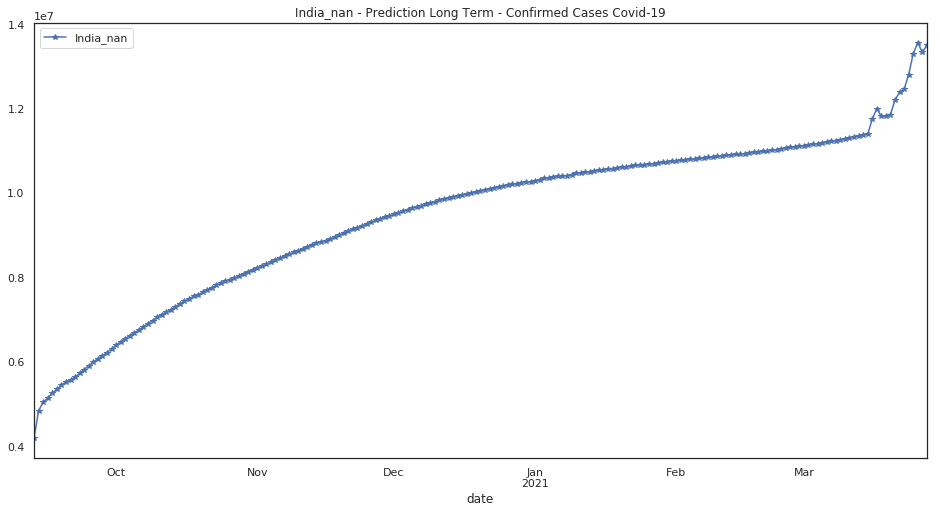

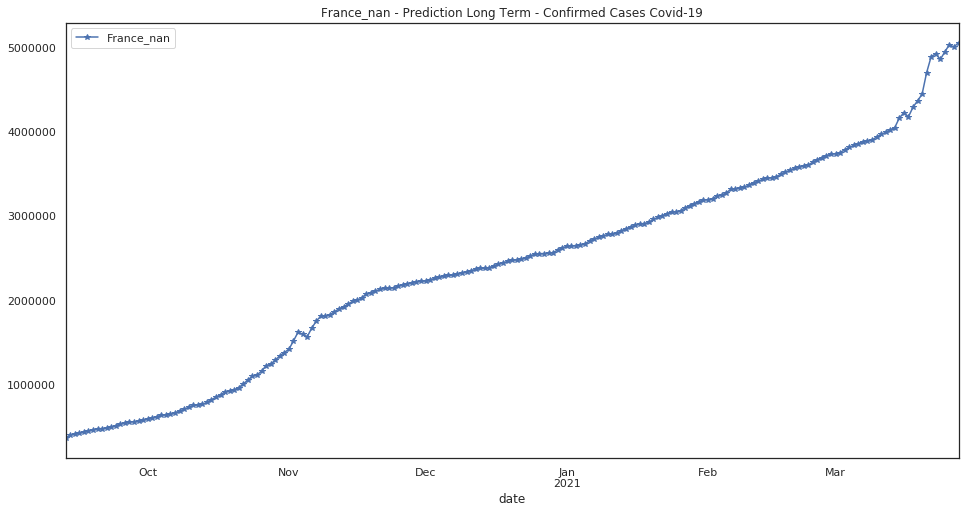

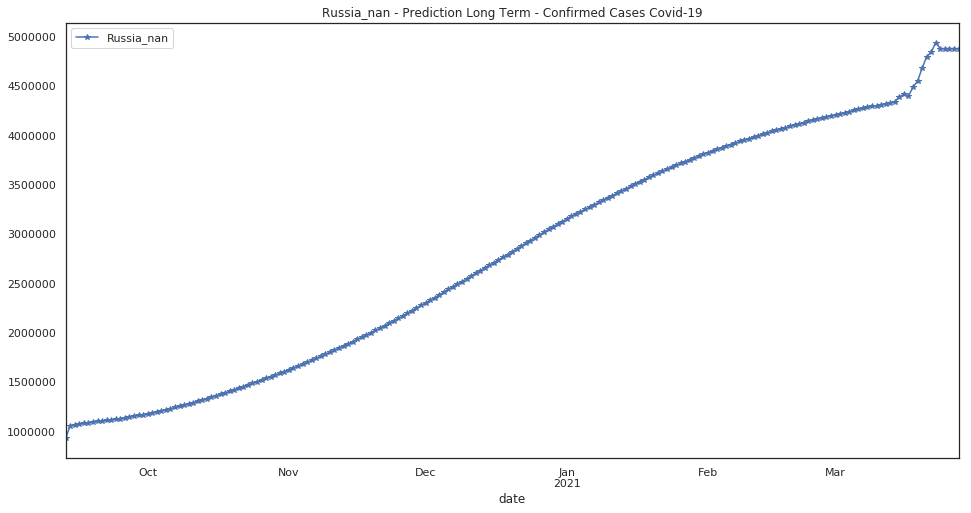

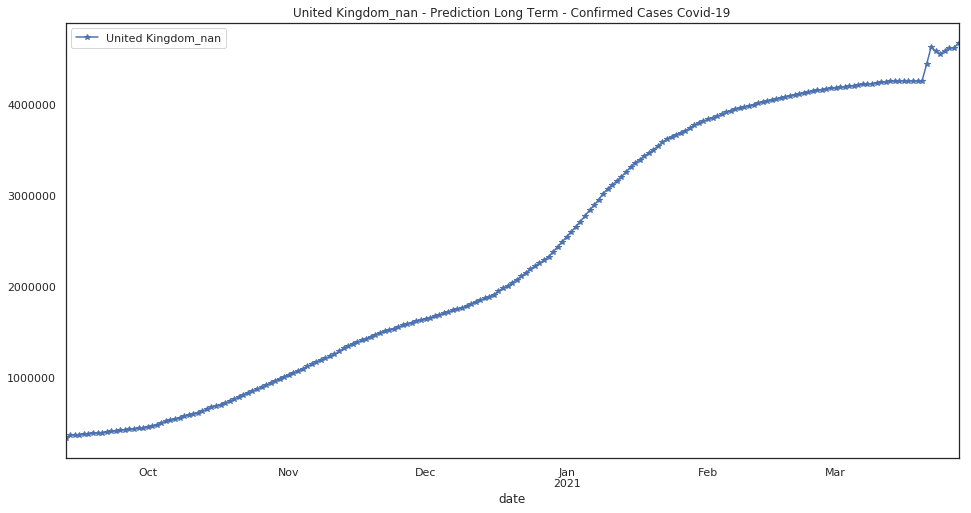

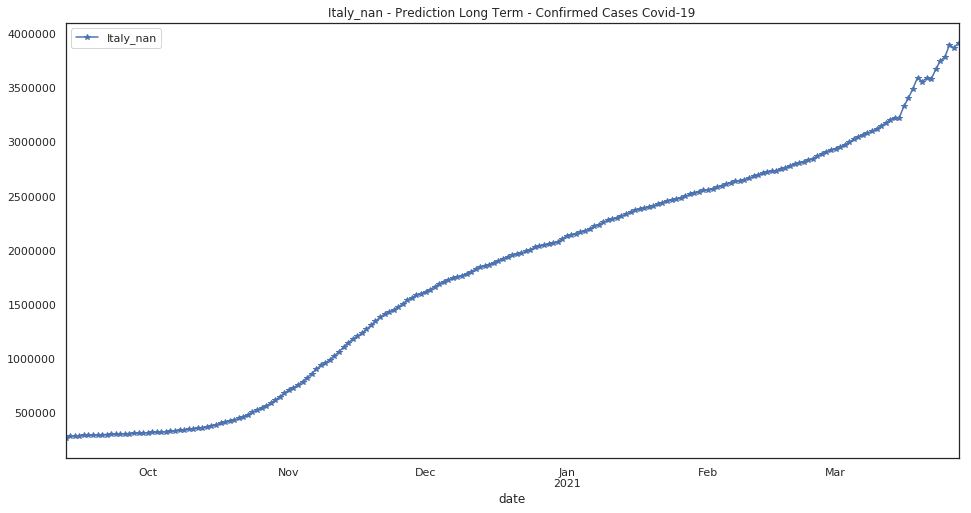

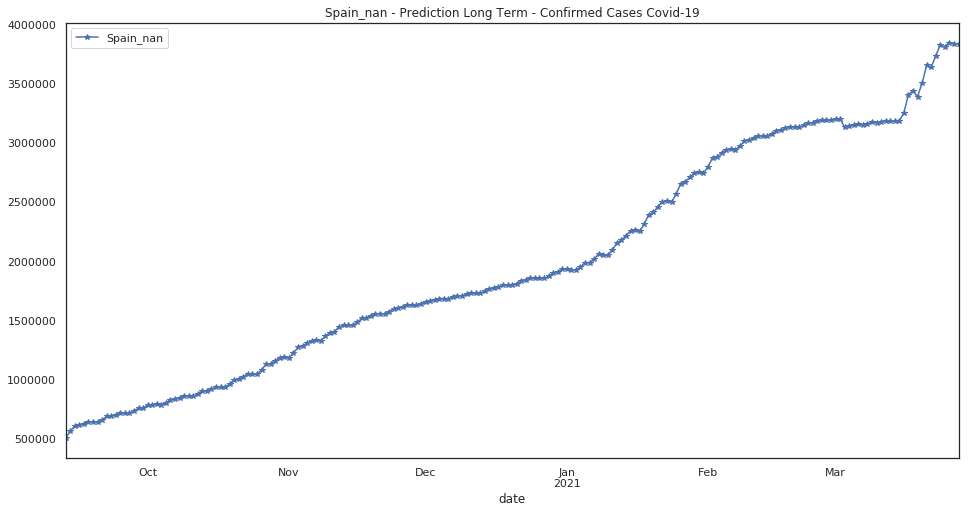

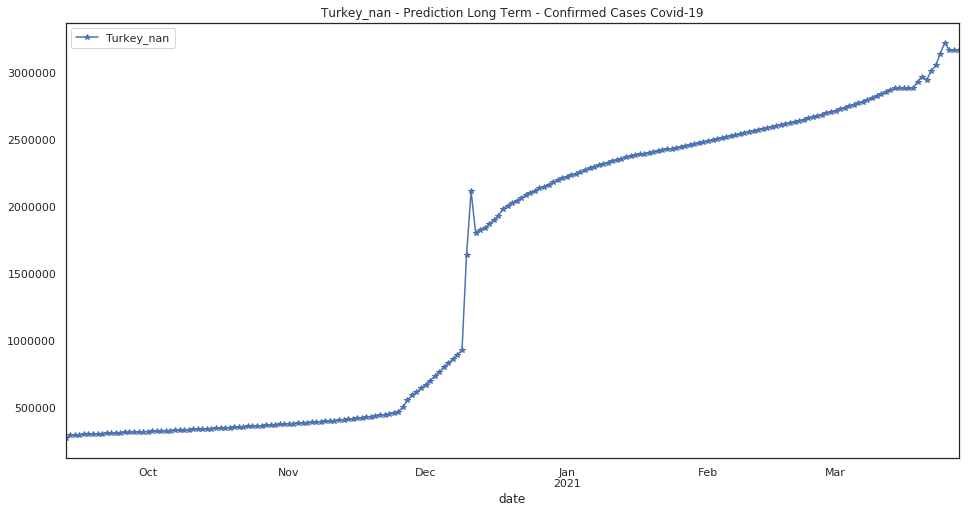

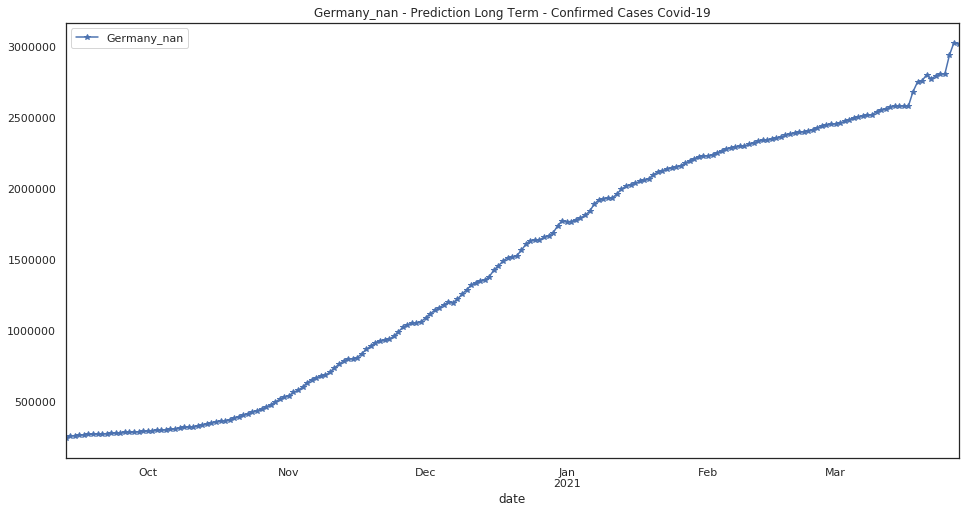

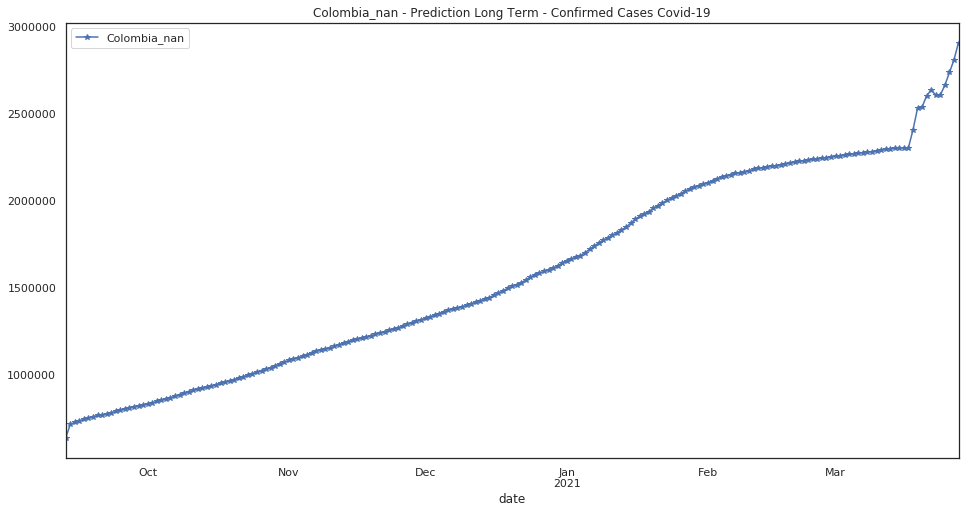

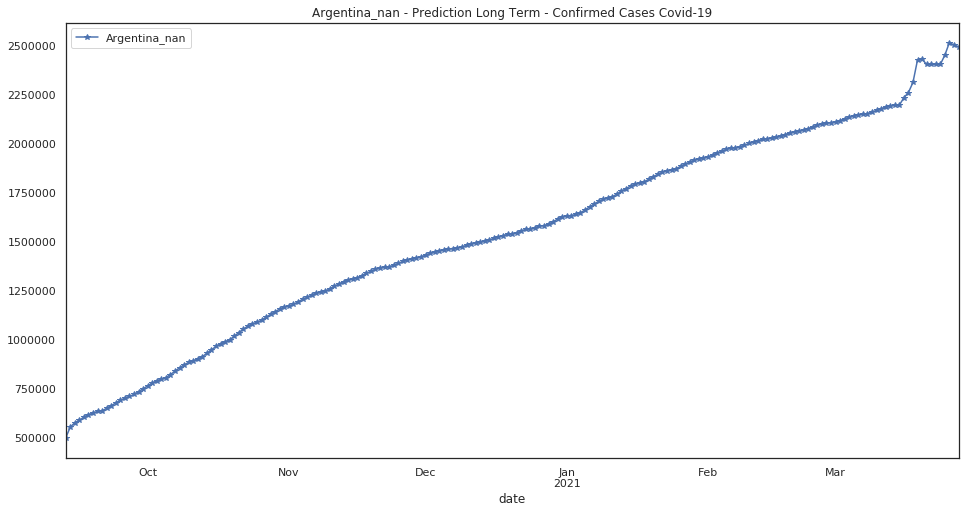

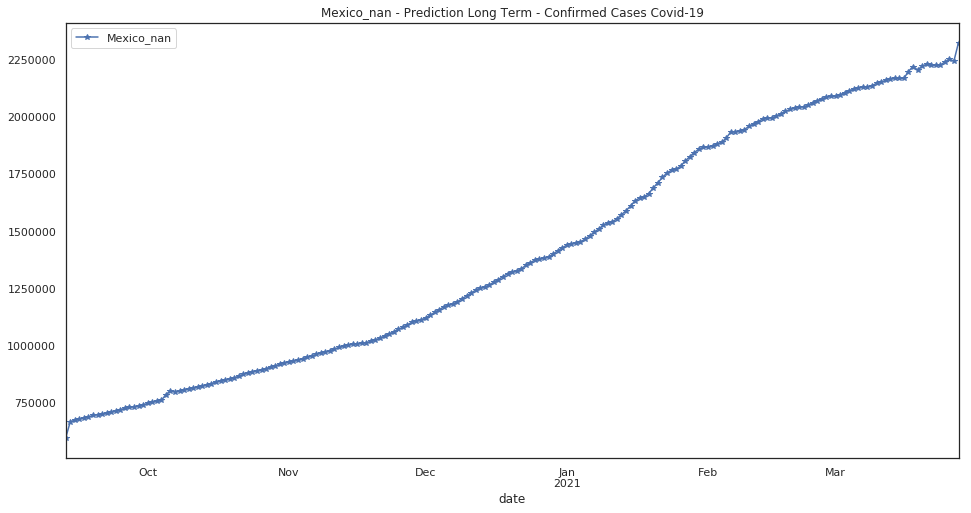

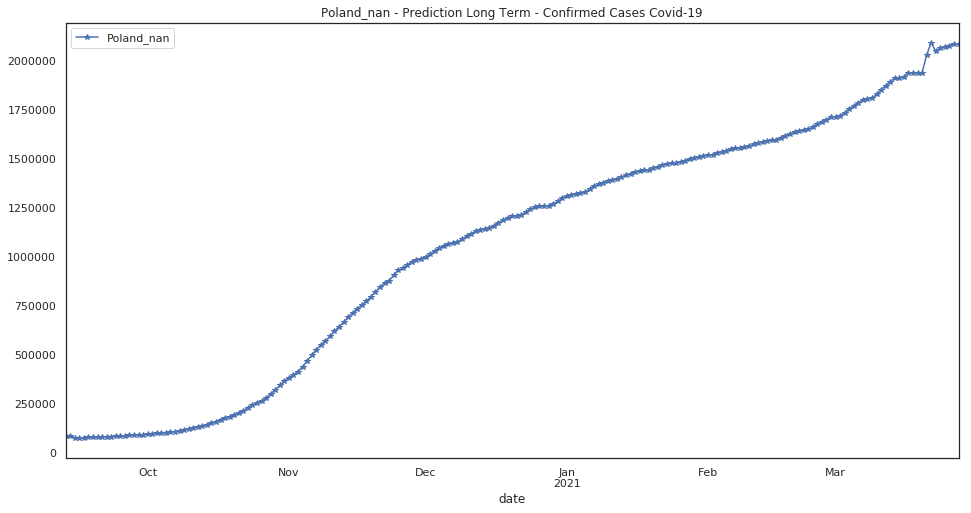

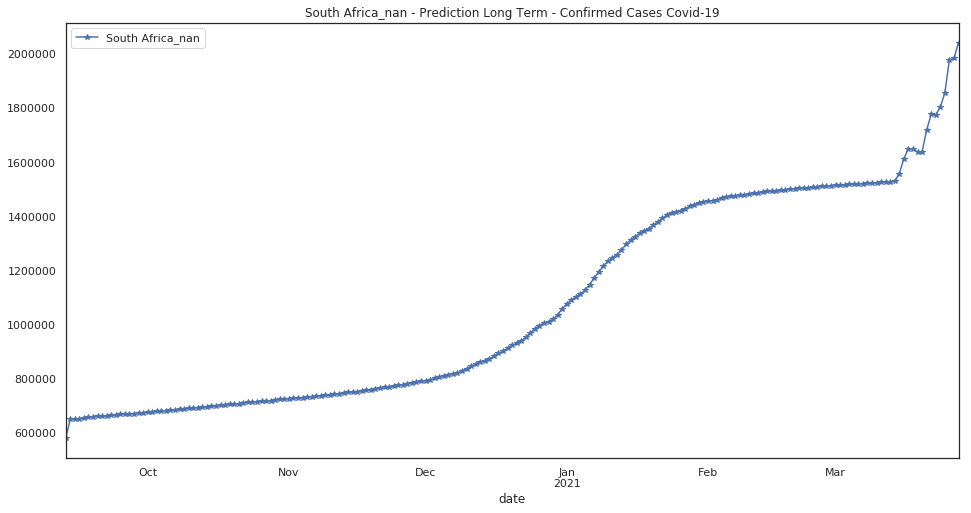

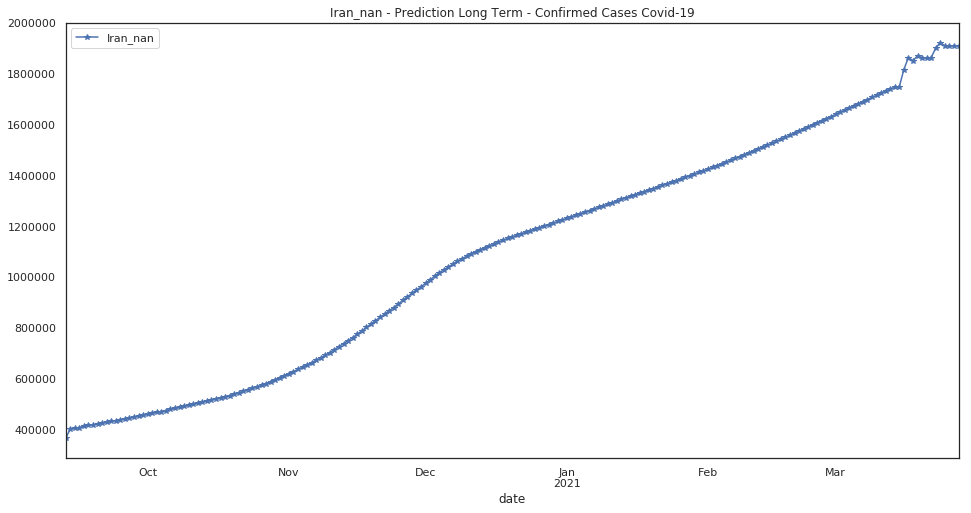

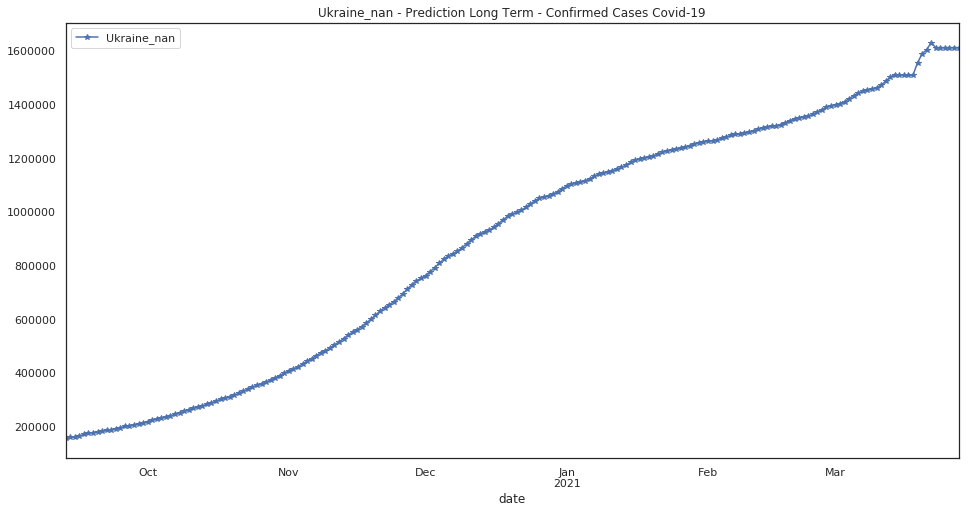

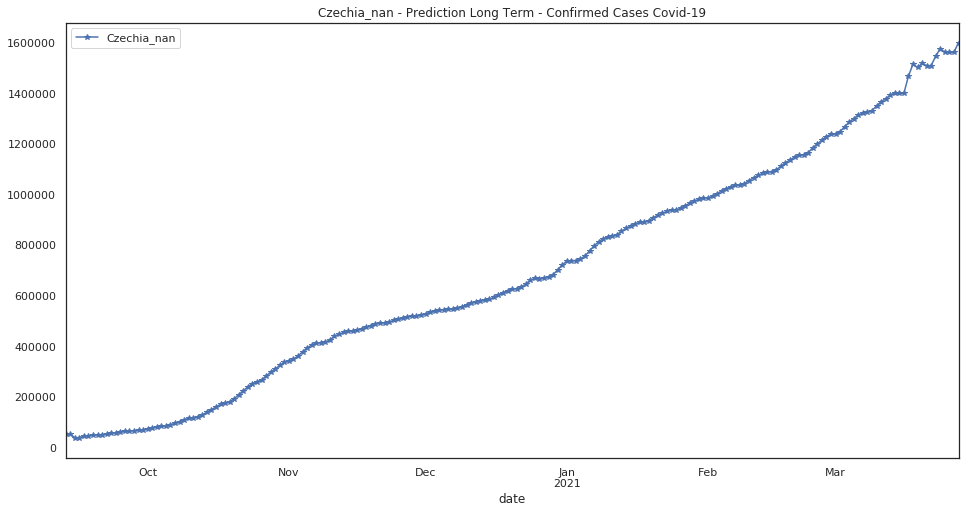

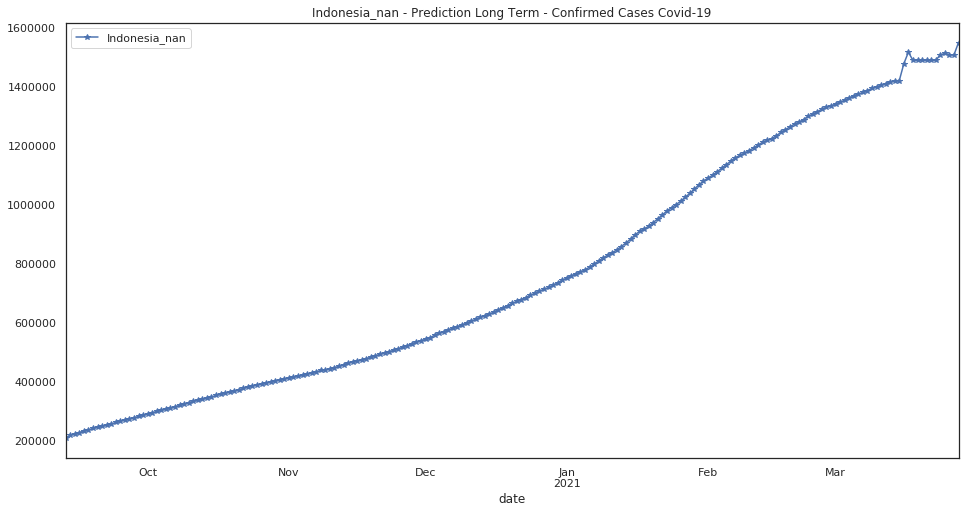

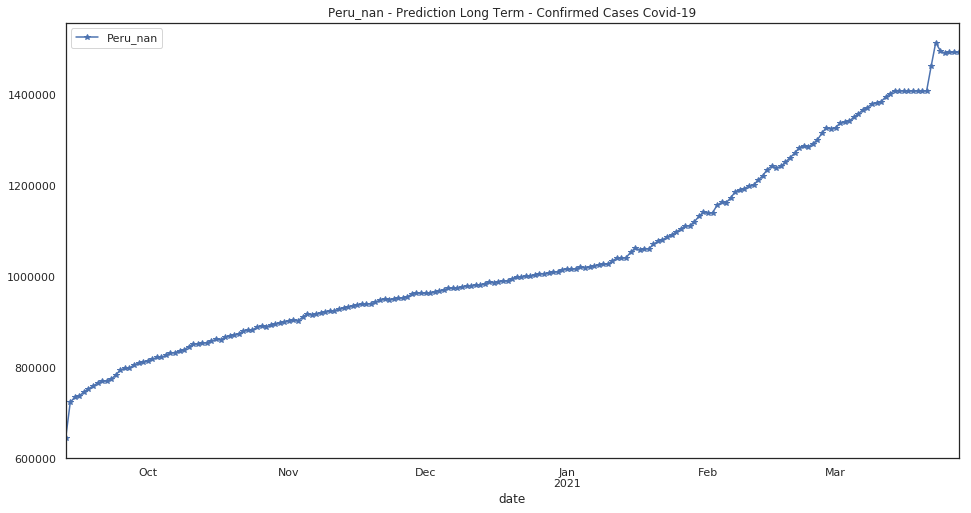

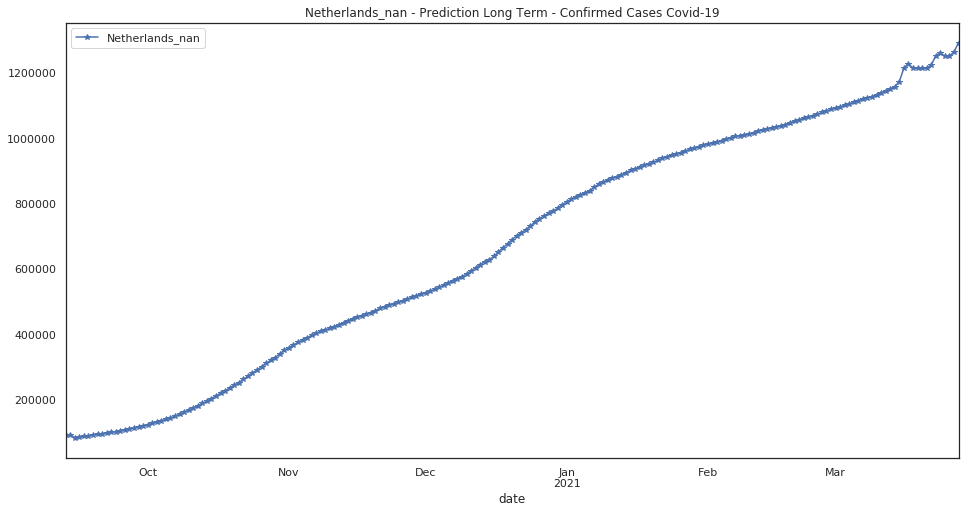

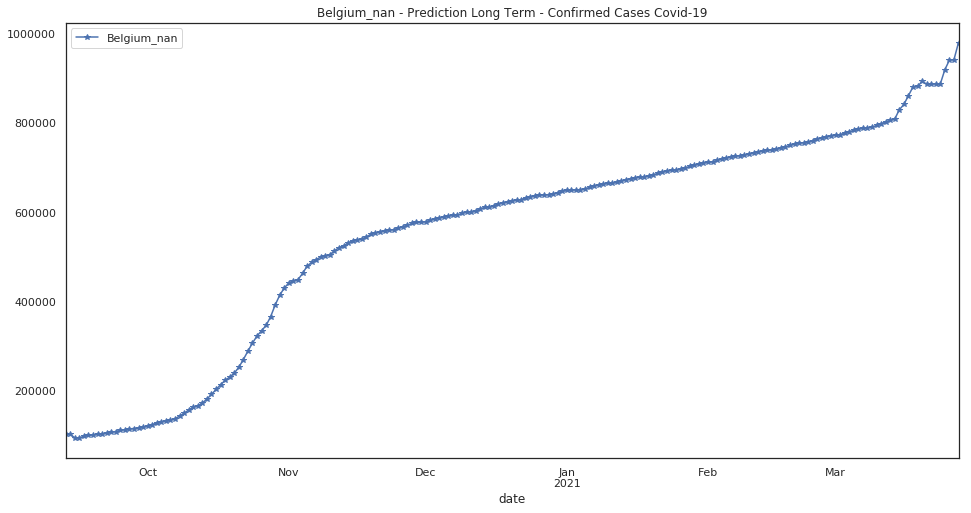

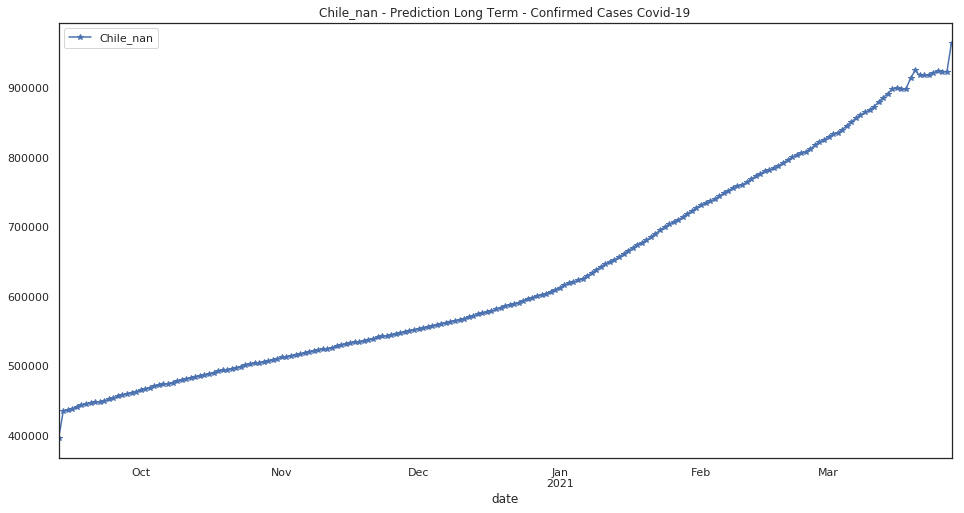

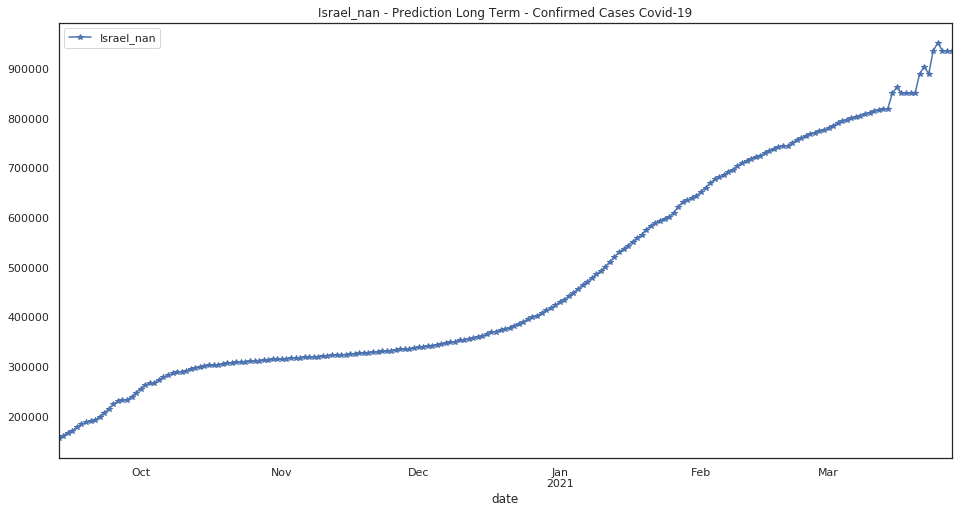

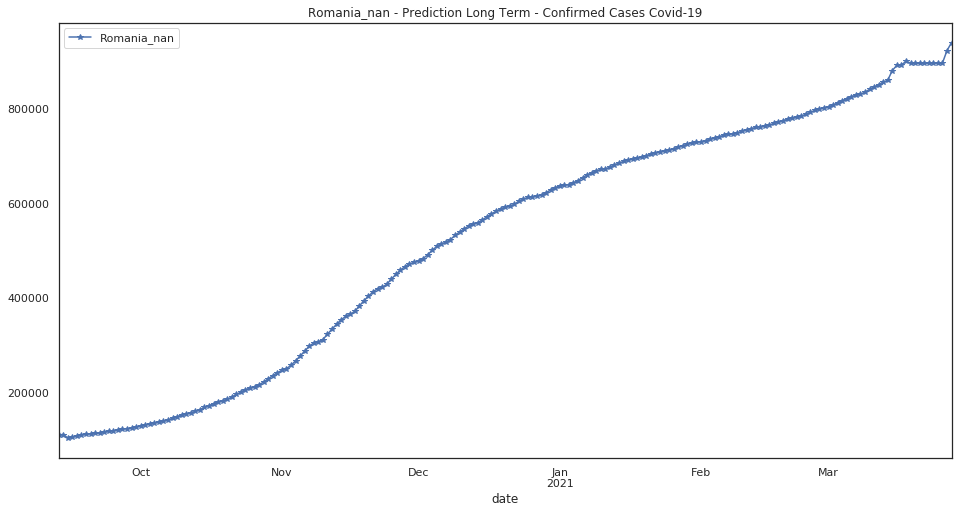

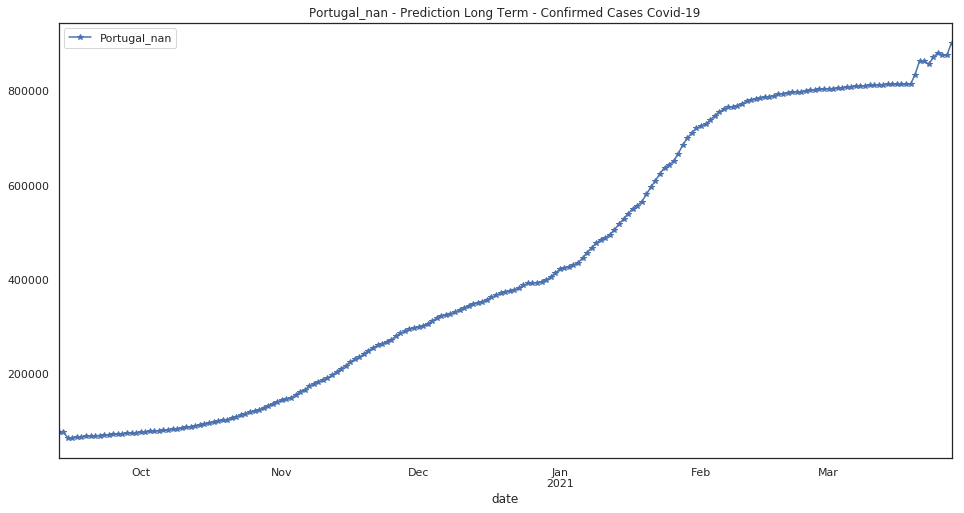

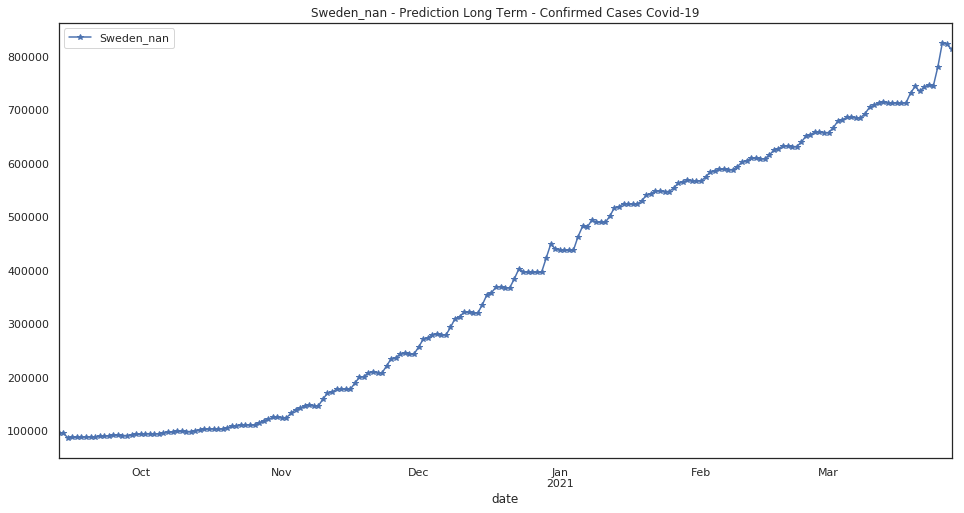

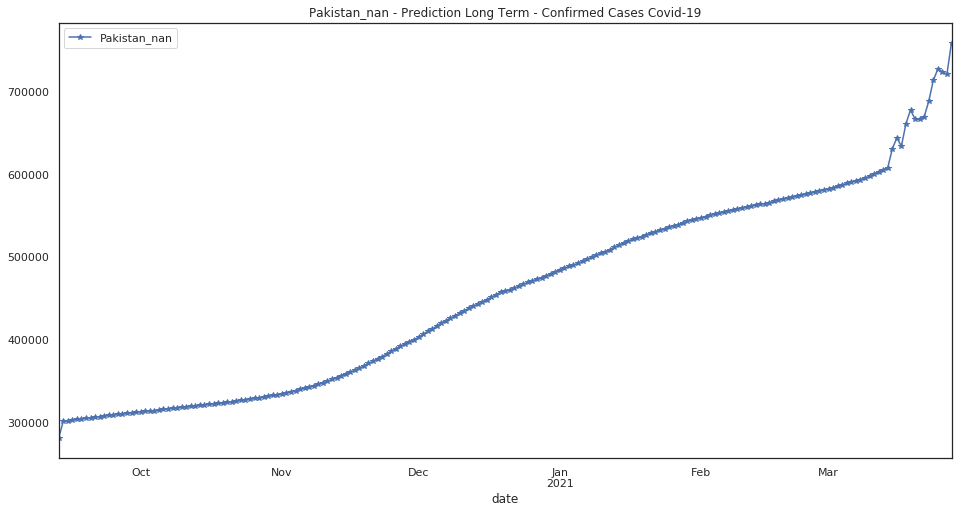

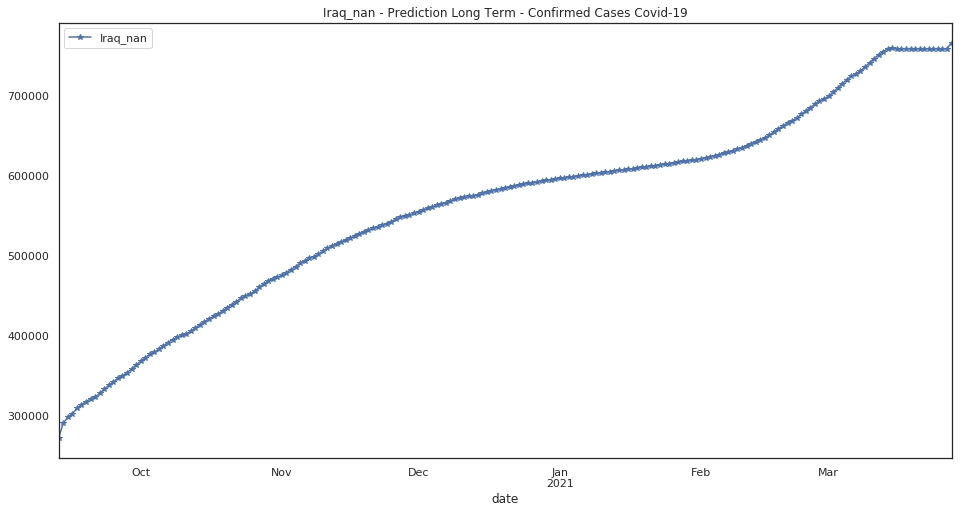

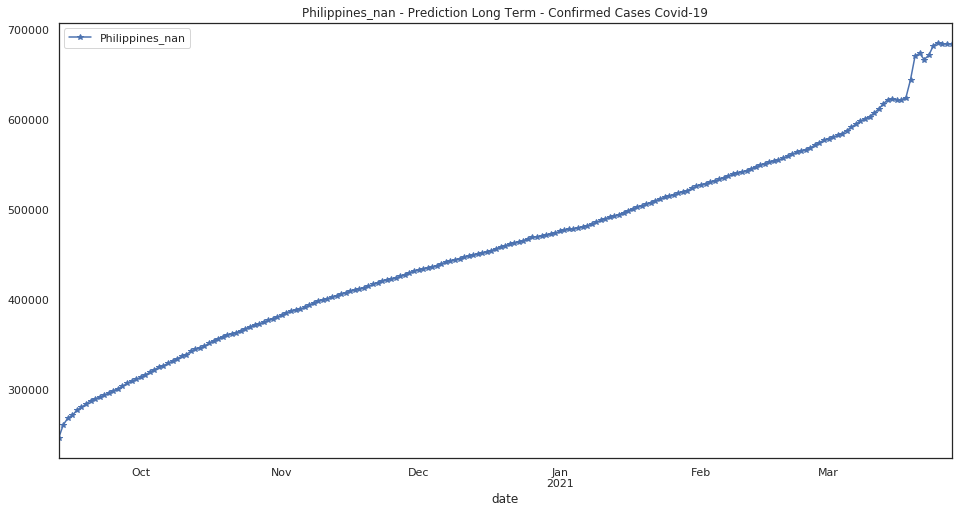

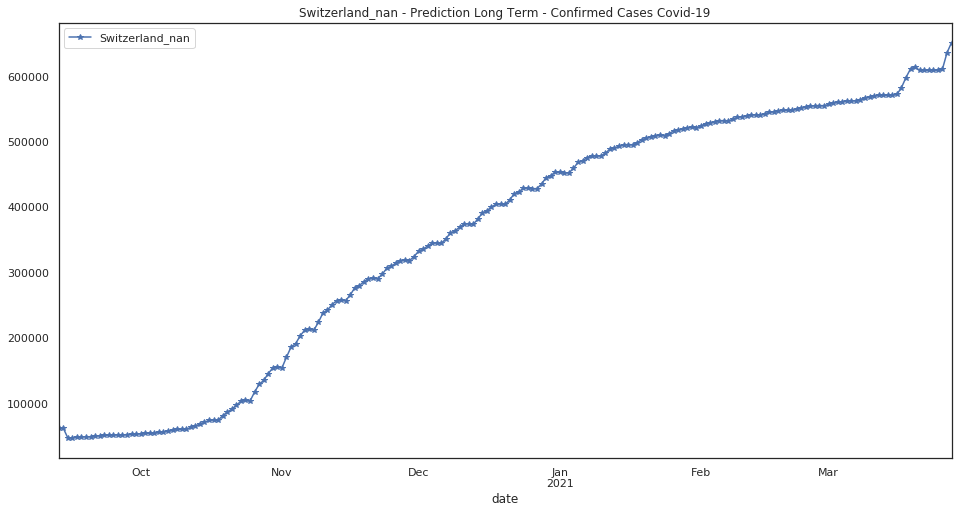

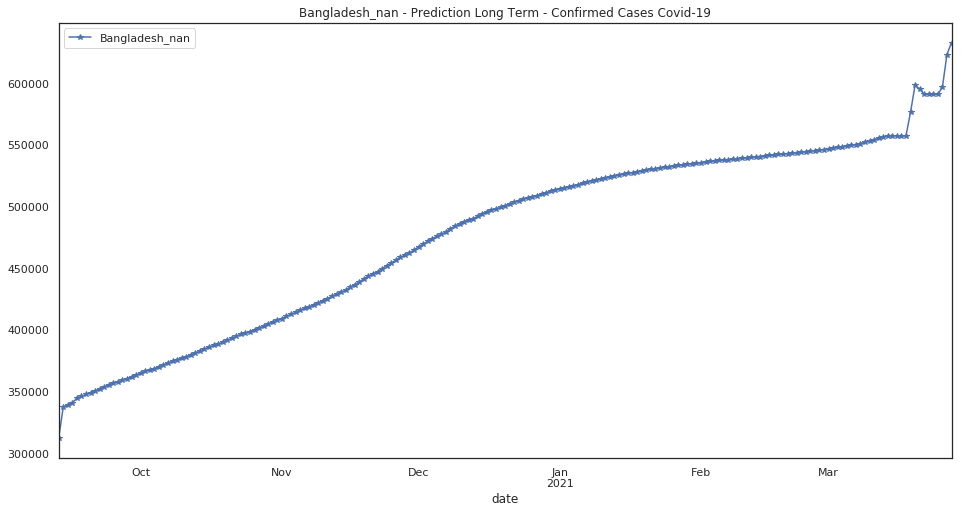

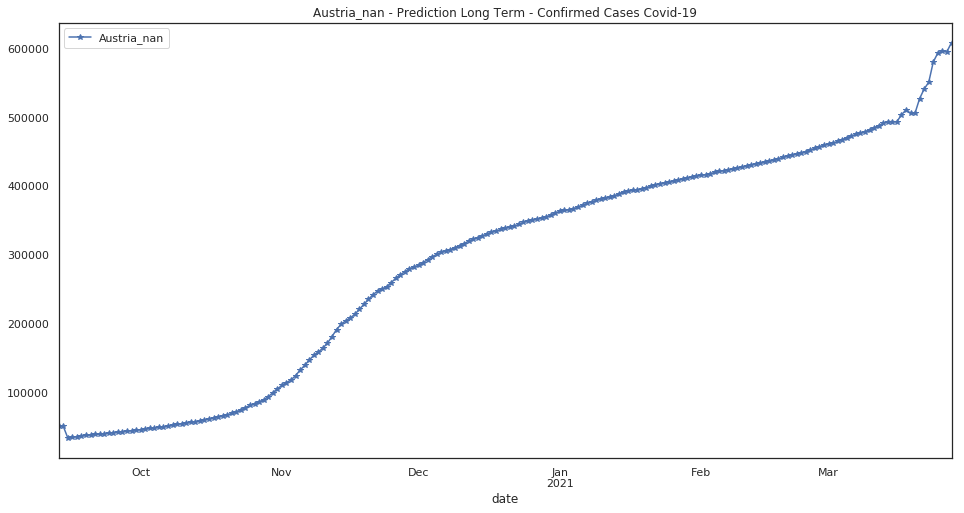

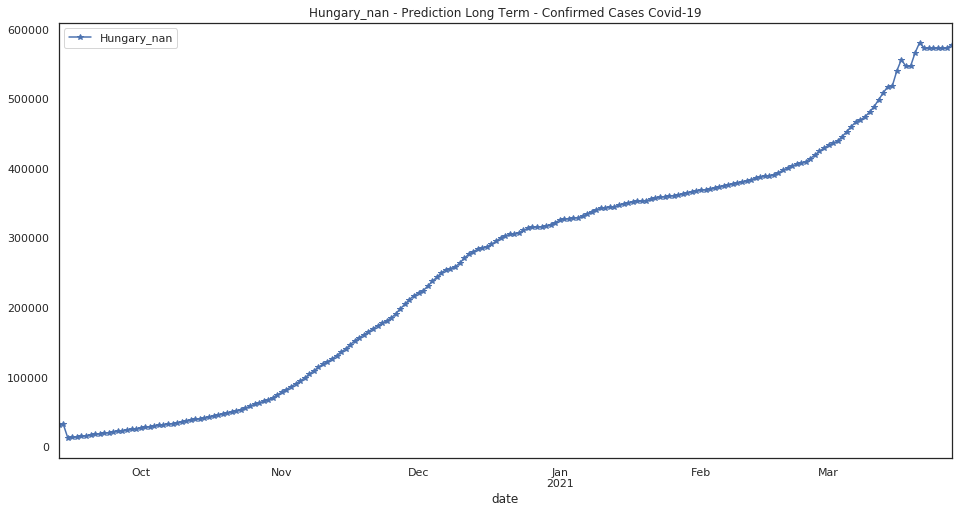

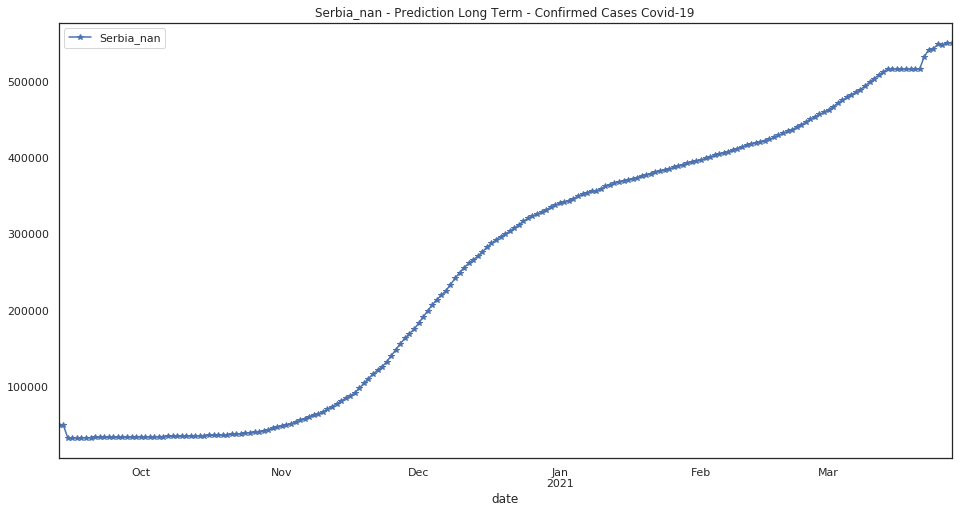

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

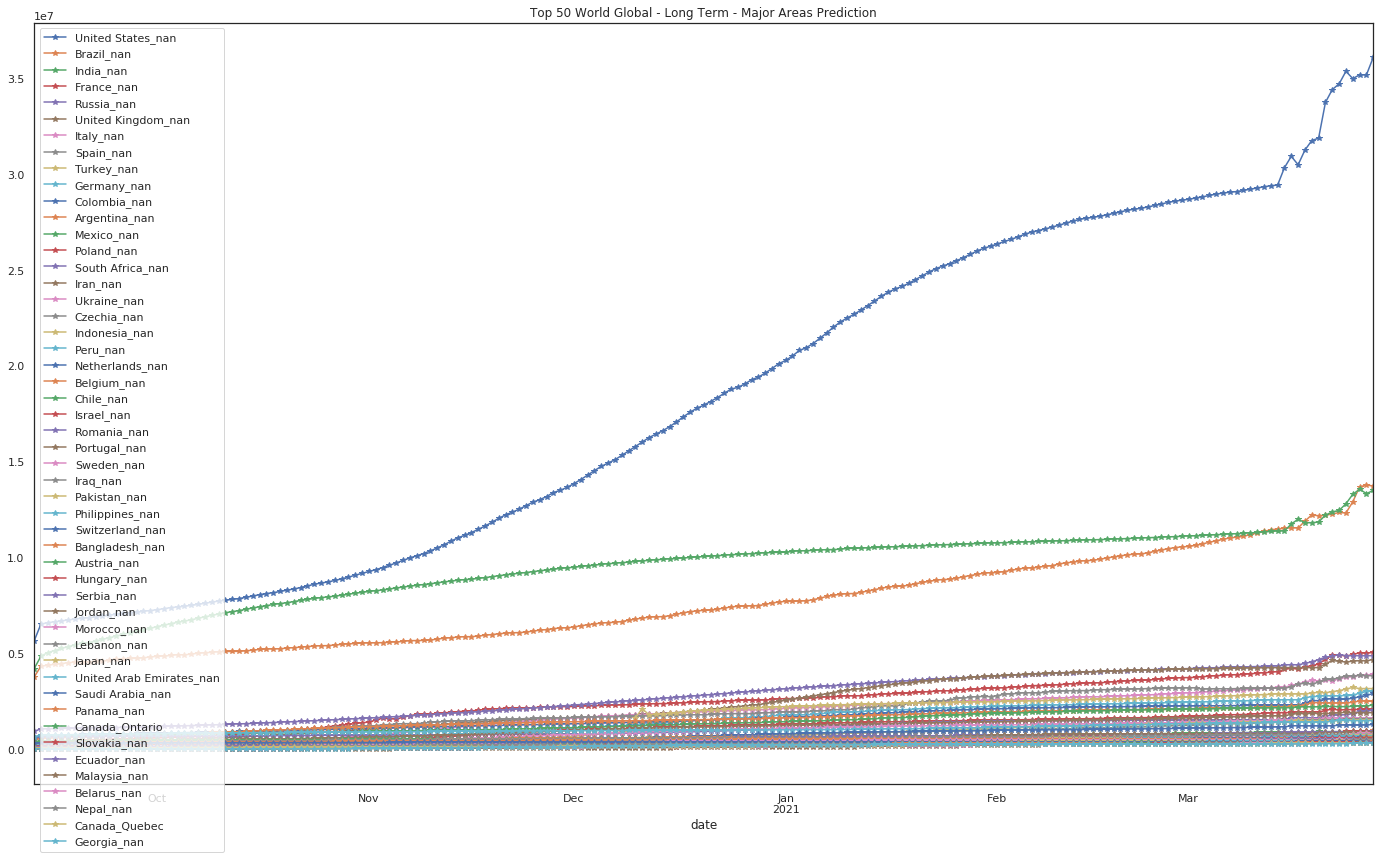

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

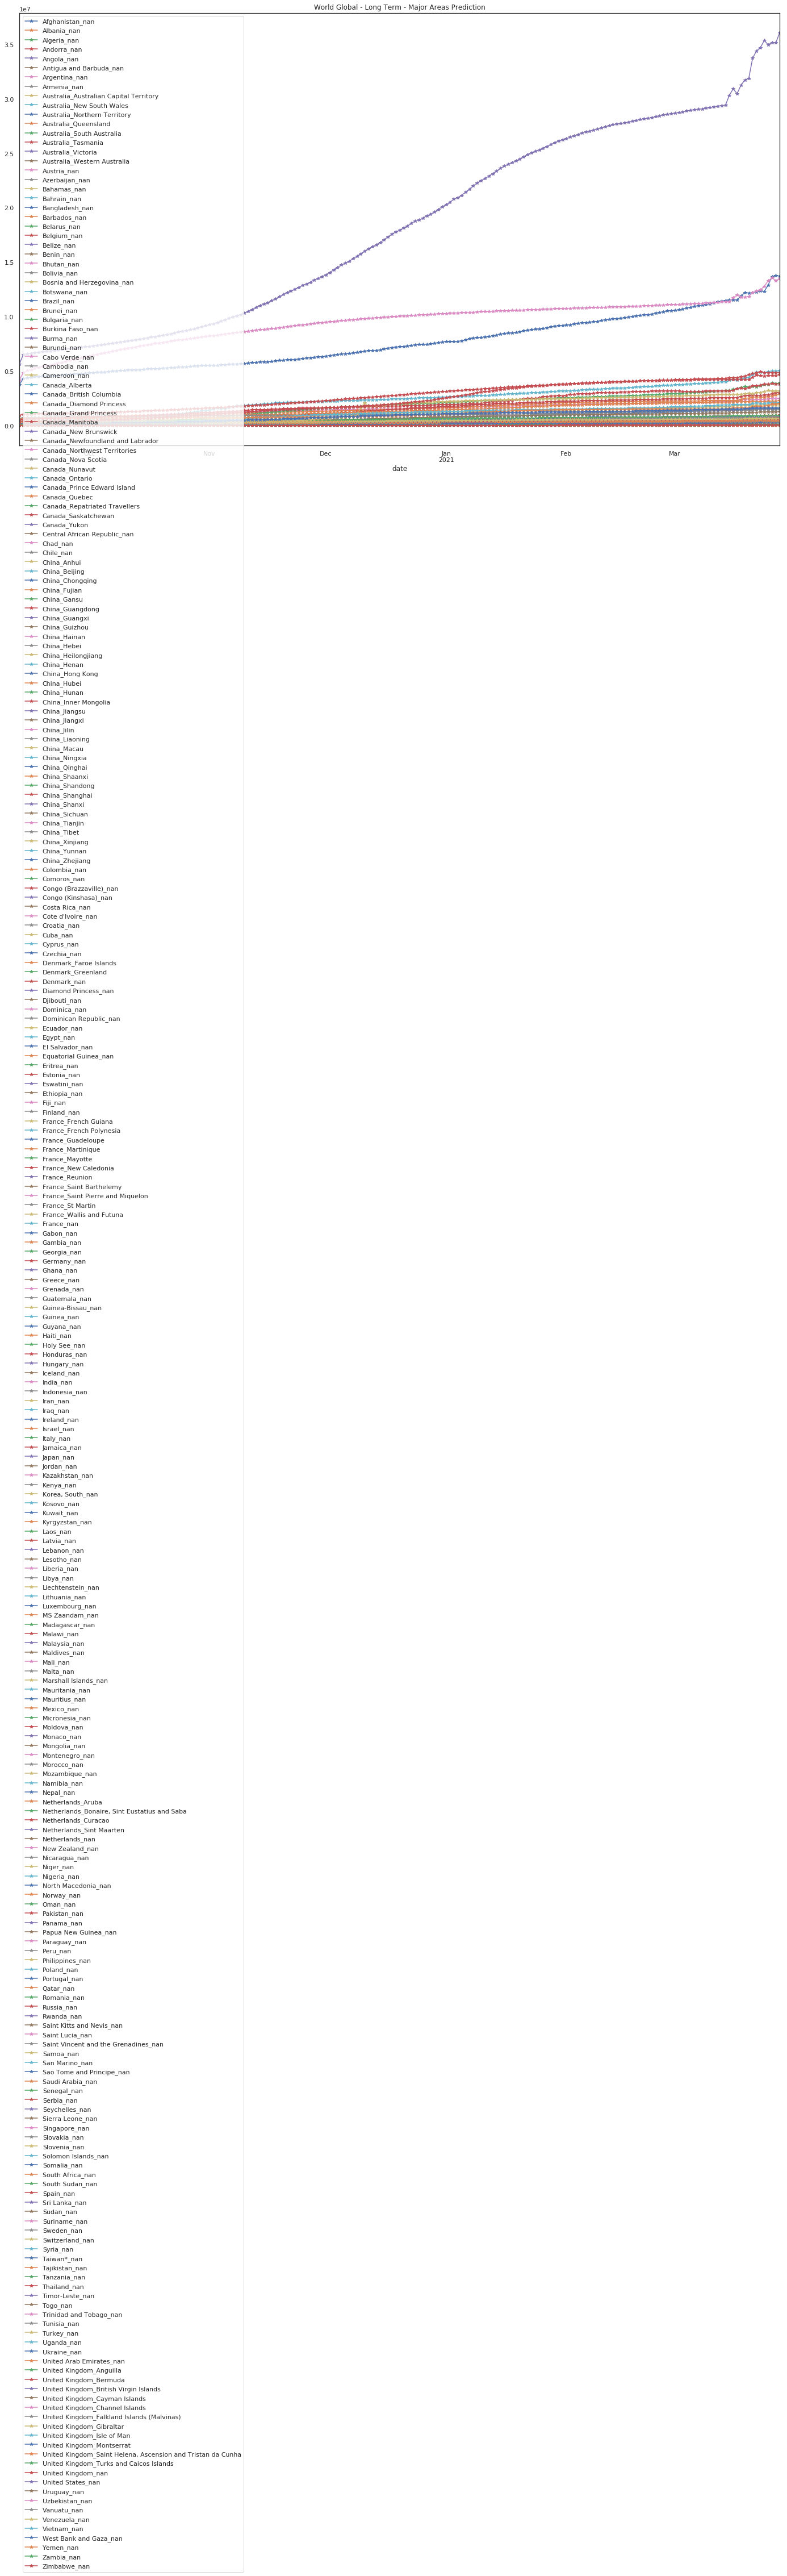

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41291.0      20004.0      57133.0       4434.0   
2020-10-29          41417.0      20268.0      57443.0       4517.0   
2020-10-30          41491.0      20610.0      57760.0       4692.0   
2020-10-31          41582.0      20837.0      58056.0       4665.0   
2020-11-01          41655.0      21202.0      58375.0       4756.0   
2020-11-02          41776.0      21474.0      58681.0       4842.0   
2020-11-03          41875.0      21853.0      59068.0       4888.0   
2020-11-04          41966.0      22226.0      59605.0       5140.0   
2020-11-05          42086.0      22645.0      60247.0       5045.0   
2020-11-06          42133.0      23121.0      60894.0       5135.0   
2020-11-07          42193.0      23587.0      61482.0       5524.0   
2020-11-08          42307.0      24093.0      62124.0       5319.0   
2020-11-09          42434.0      24621.0      62760.0       5408.0   
2020-11-10          42604.0      25168.0      63479.0       5512.0   
2020-11-11          42756.0      25671.0      64285.0       5593.0   
2020-11-12          42937.0      26125.0      65133.0       5567.0   
2020-11-13          43109.0      26640.0      66008.0       5720.0   
2020-11-14          43185.0      27124.0      66854.0       5725.0   
2020-11-15          43373.0      27700.0      67700.0       6034.0   
2020-11-16          43583.0      28298.0      68596.0       5872.0   
2020-11-17          43796.0      28994.0      69581.0       5986.0   
2020-11-18          44047.0      29687.0      70624.0       6080.0   
2020-11-19          44295.0      30469.0      71657.0       6018.0   
2020-11-20          44488.0      31284.0      72748.0       6137.0   
2020-11-21          44637.0      32028.0      73786.0       6142.0   
2020-11-22          44822.0      32650.0      74845.0       6210.0   
2020-11-23          45084.0      33446.0      75865.0       6312.0   
2020-11-24          45284.0      34125.0      76958.0       6354.0   
2020-11-25          45503.0      34802.0      78020.0       6424.0   
2020-11-26          45719.0      35498.0      79080.0       6437.0   
...                     ...          ...          ...          ...   
2021-02-27          55885.0     106170.0     113110.0      10870.0   
2021-02-28          55891.0     107152.0     113237.0      10879.0   
2021-03-01          55909.0     107946.0     113390.0      10917.0   
2021-03-02          55934.0     108783.0     113570.0      10926.0   
2021-03-03          55949.0     109673.0     113740.0      10968.0   
2021-03-04          55955.0     110514.0     113907.0      10966.0   
2021-03-05          55999.0     111317.0     114093.0      11010.0   
2021-03-06          56020.0     112079.0     114259.0      11042.0   
2021-03-07          56026.0     112900.0     114384.0      11062.0   
2021-03-08          56052.0     113619.0     114520.0      11084.0   
2021-03-09          56054.0     114221.0     114683.0      11099.0   
2021-03-10          56069.0     114845.0     114828.0      11148.0   
2021-03-11          56093.0     115453.0     114990.0      11130.0   
2021-03-12          56131.0     116125.0     115158.0      11245.0   
2021-03-13          56141.0     116850.0     115295.0      11199.0   
2021-03-14          56161.0     117523.0     115414.0      11273.0   
2021-03-15          56165.0     117615.0     119214.0      11271.0   
2021-03-16          56162.0     117474.0     120915.0      11365.0   
2021-03-17          56162.0     117474.0     121357.0      11745.0   
2021-03-18          56483.0     117474.0     122085.0      11848.0   
2021-03-19          56558.0     121806.0     121473.0      12233.0   
2021-03-20          56546.0     125209.0     121970.0      12893.0   
2021-03-21          57378.0     125856.0     122189.0      12780.0   
2021-03-22          59218.0     130017.0     128251.0      12984.0   
2021-03-23

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
250                                    Timor-Leste_nan  -8.874217  125.727539   
251                                           Togo_nan   8.619500    0.824800   
252                            Trinidad and Tobago_nan  10.691800  -61.222500   
253                                        Tunisia_nan  33.886917    9.537499   
254                                         Turkey_nan  38.963700   35.243300   
255                                  United States_nan  40.000000 -100.000000   
256                                         Uganda_nan   1.373333   32.290275   
257                                        Ukraine_nan  48.379400   31.165600   
258                           United Arab Emirates_nan  23.424076   53.847818   
259                            United Kingdom_Anguilla  18.220600  -63.068600   
260                             United Kingdom_Bermuda  32.307800  -64.750500   
261              United Kingdom_British Virgin Islands  18.420700  -64.640000   
262                      United Kingdom_Cayman Islands  19.313300  -81.254600   
263                     United Kingdom_Channel Islands  49.372300   -2.364400   
264         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
265                           United Kingdom_Gibraltar  36.140800   -5.353600   
266                         United Kingdom_Isle of Man  54.236100   -4.548100   
267                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' Roling7DayAVG='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      51            Canada_Ontario  51.253800  -85.323200   
7      53             Canada_Quebec  52.939900  -73.549100   
8      59                 Chile_nan -35.675100  -71.543000   
9      93              Colombia_nan   4.570900  -74.297300   
10    102               Czechia_nan  49.817500   15.473000   
11    110               Ecuador_nan  -1.831200  -78.183400   
12    131                France_nan  46.227600    2.213700   
13    134               Georgia_nan  42.315400   43.356900   
14    135               Georgia_nan  42.315400   43.356900   
15    136               Germany_nan  51.165691   10.451526   
16    148               Hungary_nan  47.162500   19.503300   
17    150                 India_nan  20.593684   78.962880   
18    151             Indonesia_nan  -0.789300  113.921300   
19    152                  Iran_nan  32.427908   53.688046   
20    153                  Iraq_nan  33.223191   43.679291   
21    155                Israel_nan  31.046051   34.851612   
22    156                Israel_nan  31.046051   34.851612   
23    157                 Italy_nan  41.871940   12.567380   
24    159                 Japan_nan  36.204824  138.252924   
25    160                Jordan_nan  31.240000   36.510000   
26    169               Lebanon_nan  33.854700   35.862300   
27    170               Lebanon_nan  33.854700   35.862300   
28    180              Malaysia_nan   4.210484  101.975766   
29    187                Mexico_nan  23.634500 -102.552800   
30    193               Morocco_nan  31.791700   -7.092600   
31    196                 Nepal_nan  28.166700   84.250000   
32    201           Netherlands_nan  52.132600    5.291300   
33    209              Pakistan_nan  30.375300   69.345100   
34    210                Panama_nan   8.538000  -80.782100   
35    213                  Peru_nan  -9.190000  -75.015200   
36    214           Philippines_nan  12.879721  121.774017   
37    215                Poland_nan  51.919400   19.145100   
38    216              Portugal_nan  39.399900   -8.224500   
39    218               Romania_nan  45.943200   24.966800   
40    219                Russia_nan  61.524010  105.318756   
41    227          Saudi Arabia_nan  23.885942   45.079162   
42    229                Serbia_nan  44.016500   21.005900   
43    233              Slovakia_nan  48.669000   19.699000   
44    237          South Africa_nan -30.559500   22.937500   
45    239                 Spain_nan  40.463667   -3.749220   
46    243                Sweden_nan  60.128161   18.643501   
47    244           Switzerland_nan  46.818200    8.227500   
48    254                Turkey_nan  38.963700   35.243300   
49    255         United States_nan  40.000000 -100.000000   
50    257               Ukraine_nan  48.379400   31.165600   
51    258  United Arab Emirates_nan  23.424076   53.847818   
52    270        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              500312.0             555537.0             577693.0   
1               50193.0              50522.0              33541.0   
2              312453.0             337520.0             339456.0   
3               85533.0              85695.0              74360.0   
4              102148.0             102882.0              94306.0   
5             3753058.0            4330455.0            4381030.0   
6               61675.0              62037.0              46905.0   
7               77617.0              77855.0              65262.0   
8              396231.0           

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' Roling7DayAVG='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()